In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import itertools

import matplotlib.pyplot as plt
import seaborn as sns
import anndata

from scroutines import basicu
from scroutines.config_plots import *
import importlib
importlib.reload(basicu)

<module 'scroutines.basicu' from '/scr/qlyu/projects/v1/scroutines/scroutines/basicu.py'>

In [2]:
sns.set_context('talk')

In [3]:
def get_pbulks(ddir, files, ncond, nrep, nclst, ngene):
    """
    """
    pbulks = []
    xclsts = []
    xcnsts = []
    for f in files:
        print(f)

        path = os.path.join(ddir, f)
        adata = anndata.read(path)
        genes = adata.var.index.values

        adata = adata[adata.obs['Subclass'] == 'L2/3']
        mat = adata.X
        types = adata.obs['Type'].astype(str).values 
        # 1 or 2
        sample_codes = adata.obs['sample'].apply(lambda x: x.split('_')[-1][:-1].replace('3', '2')).astype(str).values
        sample_and_type = sample_codes + "_" + types
        unqs, cnts = np.unique(sample_and_type, return_counts=True)
        _xclsts, Xk, Xk_n, Xk_ln = basicu.counts_to_bulk_profiles(mat, sample_and_type) 

        # check all types + reps are the same
        if len(xclsts) > 0:
            if not np.all(_xclsts == xclsts):
                raise ValueError(_xclsts.shape, xclsts.shape, _xclsts, xclsts,)
            if not np.all(_xclsts == unqs):
                raise ValueError(_xclsts.shape, unqs.shape, _xclsts, unqs,)
        else:
            xclsts = _xclsts
            print(xclsts)

        pbulks.append(Xk_ln)
        xcnsts.append(cnts)

    pbulks = np.array(pbulks)
    xcnsts = np.array(xcnsts)
    
    pbulks = pbulks.reshape(ncond,nrep,nclst,-1)
    xclsts = xclsts.reshape(      nrep,nclst)
    xcnsts = xcnsts.reshape(ncond,nrep,nclst)
    
    return pbulks, xcnsts, xclsts, genes

# get data

In [4]:
ddir = '../data/cheng21_cell_scrna/organized/'

In [5]:
files = [
    # 'P8NR.h5ad',
    
    # 'P14NR.h5ad',
    
    'P17NR.h5ad',
    'P21NR.h5ad',
    'P28NR.h5ad',
    'P38NR.h5ad',
    
    # 'P28DR.h5ad',
    # 'P38DR.h5ad',
    
    # 'P28DL.h5ad',
] 
# conds = np.array([f.replace('.h5ad', '') for f in files])

ncond, nrep, nclst, ngene = len(files), 2, 3, -1
pbulks_nr, xcnsts, xclsts, genes = get_pbulks(ddir, files, ncond, nrep, nclst, ngene)

xclsts_short = np.array([clst[len("1_"):] for clst in xclsts[0]]) #, '_'
numcells = pd.DataFrame(xcnsts.T.reshape(-1,nrep*ncond), index=xclsts_short)
numcells

P17NR.h5ad
['1_L2/3_A' '1_L2/3_B' '1_L2/3_C' '2_L2/3_A' '2_L2/3_B' '2_L2/3_C']
P21NR.h5ad
P28NR.h5ad
P38NR.h5ad


0     1     2    3     4     5     6     7
L2/3_A   568   490   296  114   472   715   316   361
L2/3_B  1640  1060  1218  475  1537  1318  1164  1346
L2/3_C   821   379   557  131   646   503   493   270

In [6]:
files = [
    'P14NR.h5ad',
] 

ncond, nrep, nclst, ngene = len(files), 2, 2, -1
pbulks_14, xcnsts, xclsts, genes = get_pbulks(ddir, files, ncond, nrep, nclst, ngene)

xclsts_short = np.array([clst[len("1_"):] for clst in xclsts[0]]) #, '_'
numcells = pd.DataFrame(xcnsts.T.reshape(-1,nrep*ncond), index=xclsts_short)
numcells

P14NR.h5ad
['1_L2/3_AB' '1_L2/3_BC' '2_L2/3_AB' '2_L2/3_BC']


0     1
L2/3_AB  2562  1770
L2/3_BC  1125   790

In [7]:
files = [
    'P8NR.h5ad',
] 

ncond, nrep, nclst, ngene = len(files), 2, 2, -1
pbulks_08, xcnsts, xclsts, genes = get_pbulks(ddir, files, ncond, nrep, nclst, ngene)

xclsts_short = np.array([clst[len("1_"):] for clst in xclsts[0]]) #, '_'
numcells = pd.DataFrame(xcnsts.T.reshape(-1,nrep*ncond), index=xclsts_short)
numcells

P8NR.h5ad
['1_L2/3_AB' '1_L2/3_BC' '2_L2/3_AB' '2_L2/3_BC']


0     1
L2/3_AB  676  1670
L2/3_BC  326   711

In [ ]:
files = [
    'P28DR.h5ad',
    'P38DR.h5ad',
] 

ncond, nrep, nclst, ngene = len(files), 2, 3, -1
pbulks_dr, xcnsts, xclsts, genes = get_pbulks(ddir, files, ncond, nrep, nclst, ngene)

xclsts_short = np.array([clst[len("1_"):] for clst in xclsts[0]]) #, '_'
numcells = pd.DataFrame(xcnsts.T.reshape(-1,nrep*ncond), index=xclsts_short)
numcells

P28DR.h5ad
['1_L2/3_1' '1_L2/3_2' '1_L2/3_3' '2_L2/3_1' '2_L2/3_2' '2_L2/3_3']
P38DR.h5ad


0    1     2    3
L2/3_1  552  769   903  858
L2/3_2  851  769   644  947
L2/3_3  608  888  1146  934

In [ ]:
files = [
    'P28DL.h5ad',
] 

ncond, nrep, nclst, ngene = len(files), 2, 3, -1
pbulks_dl, xcnsts, xclsts, genes = get_pbulks(ddir, files, ncond, nrep, nclst, ngene)

xclsts_short = np.array([clst[len("1_"):] for clst in xclsts[0]]) #, '_'
numcells = pd.DataFrame(xcnsts.T.reshape(-1,nrep*ncond), index=xclsts_short)
numcells

P28DL.h5ad
['1_L2/3_1' '1_L2/3_2' '1_L2/3_3' '2_L2/3_1' '2_L2/3_2' '2_L2/3_3']


0    1
L2/3_1  1063  954
L2/3_2   905  919
L2/3_3   399  419

In [ ]:
xlbls_nr = [''.join(i) for i in itertools.product(['A_', 'B_', 'C_'], ['P17', 'P21', 'P28', 'P38'], ['_1', '_2'])]
xlbls_14 = [''.join(i) for i in itertools.product(['AB_', 'BC_', ],   ['P14',],                     ['_1', '_2'])]
xlbls_08 = [''.join(i) for i in itertools.product(['AB_', 'BC_', ],   ['P08',],                     ['_1', '_2'])]
xlbls_dr = [''.join(i) for i in itertools.product(['1_', '2_', '3_'], ['P28DR', 'P38DR', ],         ['_1', '_2'])]
xlbls_dl = [''.join(i) for i in itertools.product(['1_', '2_', '3_'], ['P28DL', ],                  ['_1', '_2'])]

In [ ]:
pbulks_nr.shape, pbulks_14.shape, pbulks_dr.shape, pbulks_dl.shape

((4, 2, 3, 53801), (1, 2, 2, 53801), (2, 2, 3, 53801), (1, 2, 3, 53801))

# check the L23 type genes 

In [45]:
f = "../data/cheng21_cell_scrna/res/L23-ABC-genes-n288-n286unq.csv"
# f = "../data/cheng21_cell_scrna/res/L23P28DR-123-genes-n700.csv"
dfg0 = pd.read_csv(f, header=None)
genes_l230 = dfg0[0].unique()
dfg0

0   1
0            Matn2  A2
1          Fam126a  A2
2           Egfem1  A2
3          Gm19410  A2
4             Grk3  A2
..             ...  ..
281         Brinp3  C3
282           Ell2  C3
283        Gm21949  C3
284           Jdp2  C3
285  3632451O06Rik  C3

[286 rows x 2 columns]

In [ ]:
# f = "../data/cheng21_cell_scrna/res/L23-ABC-genes-n288-n286unq.csv"
f = "../data/cheng21_cell_scrna/res/L23P28DR-123-genes-n700.csv"
dfg = pd.read_csv(f, header=None)
genes_l23 = dfg[0].unique()
dfg

0  1   2
0      Hrh2  A  A2
1      Shc3  A  A2
2      Gga2  A  A2
3     Cdh13  A  A2
4     Palmd  A  A2
..      ... ..  ..
695    Nefm  C  C3
696   Arl5b  C  C3
697  Fbxo33  C  C3
698  Clstn3  C  C3
699    Irs2  C  C3

[700 rows x 3 columns]

In [54]:
genes_shared = np.intersect1d(genes_l230, genes_l23)
genes_shared.shape

(18,)

In [53]:
# dfg0[dfg0[0].isin(genes_shared)]
# dfg[dfg[0].isin(genes_shared)]

pd.merge(dfg0, dfg, on=0)


0 1_x 1_y   2
0      Cdh13  A1   A  A2
1        Nov  A3   B  B3
2     Zfp608  A3   A  A1
3       Wnt4  A0   B  B3
4       Pnck  A0   B  B3
5       Bdnf  B0   C  C2
6      Nptx2  B0   C  C2
7       Scg3  B0   C  C1
8      Npas4  B0   B  B0
9      Baz1a  B2   C  C0
10    Phf21b  B2   C  C0
11     Kcna1  C1   B  B3
12    Ddit4l  C0   B  B2
13      Nefm  C0   C  C3
14      Mgll  C0   B  B1
15    Epha10  C3   C  C2
16  AI593442  C3   B  B2
17      Ell2  C3   C  C1

In [ ]:
gene_counts = [14, 594, 92]
gene_counts

[14, 594, 92]

In [20]:
gidx = basicu.get_index_from_array(genes, genes_l23)

In [21]:
def get_stats_3clsts(pbulks, gidx):
    """
    """
    pbsub_a = basicu.merge_first_few_dims(pbulks[:,:,0,gidx]).T
    pbsub_b = basicu.merge_first_few_dims(pbulks[:,:,1,gidx]).T
    pbsub_c = basicu.merge_first_few_dims(pbulks[:,:,2,gidx]).T

    pbsub        = np.hstack([pbsub_a, pbsub_b, pbsub_c]) 
    pbsub_logfc  = pbsub - np.mean(pbsub, axis=1).reshape(-1,1)
    pbsub_zscore = pbsub_logfc/np.std(pbsub_logfc, axis=1).reshape(-1,1)

    maxexp = np.max([np.mean(pbsub_a, axis=1), 
                     np.mean(pbsub_b, axis=1), 
                     np.mean(pbsub_c, axis=1),
                    ], axis=0)

    minexp = np.min([np.mean(pbsub_a, axis=1), 
                     np.mean(pbsub_b, axis=1), 
                     np.mean(pbsub_c, axis=1),
                    ], axis=0)
    lfcexp = maxexp-minexp

    return pbsub, pbsub_logfc, pbsub_zscore, maxexp, minexp, lfcexp

def get_stats_2clsts(pbulks, gidx):
    """
    """
    pbsub_a = basicu.merge_first_few_dims(pbulks[:,:,0,gidx]).T
    pbsub_b = basicu.merge_first_few_dims(pbulks[:,:,1,gidx]).T

    pbsub        = np.hstack([pbsub_a, pbsub_b,]) 
    pbsub_logfc  = pbsub - np.mean(pbsub, axis=1).reshape(-1,1)
    pbsub_zscore = pbsub_logfc/np.std(pbsub_logfc, axis=1).reshape(-1,1)

    maxexp = np.max([np.mean(pbsub_a, axis=1), 
                     np.mean(pbsub_b, axis=1), 
                    ], axis=0)

    minexp = np.min([np.mean(pbsub_a, axis=1), 
                     np.mean(pbsub_b, axis=1), 
                    ], axis=0)
    lfcexp = maxexp-minexp

    return pbsub, pbsub_logfc, pbsub_zscore, maxexp, minexp, lfcexp

In [28]:
def plot_heatmap(pbsub, pbsub_logfc, pbsub_zscore, xlbls_short):
    """
    """
    fig, axs = plt.subplot_mosaic("A"*5+"B"*5+"C"*5+"D", figsize=(3*4,10), sharey=True)
    ax = axs["A"]
    sns.heatmap(pbsub, 
                yticklabels=50,
                xticklabels=xlbls_short, 
                cmap='coolwarm', 
                cbar_kws=dict(location='top', shrink=0.5, label='log10(CPM+1)', ticks=[0,1,2,3]),
                vmin=0, 
                # vmax=3,
                ax=ax,
               )
    ax.set_ylabel(f'Genes (n={len(pbsub)})')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
    ax.hlines(np.cumsum(gene_counts), xmin=-1, xmax=pbsub.shape[1]+1, color='black', linewidth=2, linestyle='--')

    ax = axs["B"]
    sns.heatmap(pbsub_logfc, 
                yticklabels=50,
                xticklabels=xlbls_short, 
                cmap='coolwarm', 
                cbar_kws=dict(location='top', shrink=0.5, label='log10(FC)'),
                center=0,
                ax=ax,
               )
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
    ax.hlines(np.cumsum(gene_counts), xmin=-1, xmax=pbsub.shape[1]+1, color='black', linewidth=2, linestyle='--')

    ax = axs["C"]
    sns.heatmap(pbsub_zscore, 
                yticklabels=50,
                xticklabels=xlbls_short, 
                cmap='coolwarm', 
                cbar_kws=dict(location='top', shrink=0.5, label='zscore'),
                center=0,
                ax=ax,
               )
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
    ax.hlines(np.cumsum(gene_counts), xmin=-1, xmax=pbsub.shape[1]+1, color='black', linewidth=2, linestyle='--')

    # ax = axs["D"]
    # sns.heatmap(ispicked.reshape(-1,1), 
    #             yticklabels=50,
    #             xticklabels=False, 
    #             cmap='Reds', 
    #             cbar_kws=dict(location='top', shrink=1, ticks=[0,1], label='picked', aspect=5),
    #             ax=ax,
    #            )
    # ax.set_xlabel('Picked')

    fig.tight_layout()
    plt.show()

In [30]:
def plot_heatmap_v2(pbsub, pbsub_logfc, pbsub_zscore, xlbls_short):
    """
    """
    fig, axs = plt.subplot_mosaic("A"*5+"B"*5+"C"*5, figsize=(3*4,10), sharey=True)

    ax = axs["A"]
    sns.heatmap(pbsub, 
                yticklabels=50,
                xticklabels=xlbls_short, 
                cmap='coolwarm', 
                cbar_kws=dict(location='top', shrink=0.5, label='log10(CPM+1)', ticks=[0,1,2,3]),
                vmin=0, 
                ax=ax,
               )
    ax.set_ylabel('Genes')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)

    ax = axs["B"]
    sns.heatmap(pbsub_logfc, 
                yticklabels=50,
                xticklabels=xlbls_short, 
                cmap='coolwarm', 
                cbar_kws=dict(location='top', shrink=0.5, label='log10(FC)'),
                center=0,
                ax=ax,
               )
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)

    ax = axs["C"]
    sns.heatmap(pbsub_zscore, 
                yticklabels=50,
                xticklabels=xlbls_short, 
                cmap='coolwarm', 
                cbar_kws=dict(location='top', shrink=0.5, label='zscore'),
                center=0,
                ax=ax,
               )
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)

    fig.tight_layout()
    plt.show()

In [31]:
def plot_l23genes(maxexp, minexp, lfcexp, order=None, axs=None):
    """
    """
    n = len(maxexp)
    if order is None:
        order = np.arange(n)
        
    if axs is None:
        fig, axs = plt.subplots(2,1,figsize=(1*10,2*3), sharex=True)
        
    ax = axs[0]
    ax.plot(maxexp[order], label='max type') #, color='C1')
    ax.plot(minexp[order], label='min type') #, color='k')
    # ax.scatter(np.arange(n)[ispicked[order]], maxexp[order][ispicked[order]], s=5, color='r', zorder=2, label=f'picked n={ispicked.sum()}')
    ax.set_ylabel('log10(CPM+1)')
    sns.despine(ax=ax)
    ax.legend(bbox_to_anchor=(1,1), loc='upper left')

    ax = axs[1]
    ax.plot(lfcexp[order], color='k')
    ax.axhline(np.log10(2), color='gray', linestyle='--', label='2-fold')
    # ax.scatter(np.arange(n)[ispicked[order]], lfcexp[order][ispicked[order]], s=5, color='r', zorder=2, label=f'picked n={ispicked.sum()}')
    ax.set_ylabel('log10FC\n(max type/min type)')
    ax.set_xlabel('L2/3 genes')
    sns.despine(ax=ax)
    ax.legend(bbox_to_anchor=(1,1), loc='upper left')

    return 

In [32]:
def plot_l23genes_v2(maxexp, minexp, lfcexp, order=None, axs=None, color=None, lbl=None):
    """
    """
    n = len(maxexp)
    if order is None:
        order = np.arange(n)
        
    if axs is None:
        fig, axs = plt.subplots(3,1,figsize=(1*10,3*3), sharex=True)
        
    ax = axs[0]
    ax.plot(maxexp[order], label=lbl, color=color, linewidth=1) #, color='C1')
    # ax.scatter(np.arange(n)[ispicked[order]], maxexp[order][ispicked[order]], s=5, color='r', zorder=2, label=f'picked n={ispicked.sum()}')
    ax.set_ylabel('max log10(CPM+1)')
    sns.despine(ax=ax)
    ax.legend(bbox_to_anchor=(1,1), loc='upper left')
    
    ax = axs[1]
    ax.plot(minexp[order], label='' , color=color, linewidth=1,) #, color='k')
    ax.set_ylabel('min log10(CPM+1)')
    sns.despine(ax=ax)
    
    ax = axs[2]
    ax.plot(lfcexp[order], color=color, label=lbl, linewidth=2)
    ax.axhline(np.log10(2), linestyle='--', color='gray')
    # ax.scatter(np.arange(n)[ispicked[order]], lfcexp[order][ispicked[order]], s=5, color='r', zorder=2, label=f'picked n={ispicked.sum()}')
    ax.set_ylabel('log10FC\n(max type/min type)')
    ax.set_xlabel('L2/3 genes')
    sns.despine(ax=ax)
    ax.legend(bbox_to_anchor=(1,1), loc='upper left')

    return 

In [33]:
pbsub_nr, pbsub_logfc_nr, pbsub_zscore_nr, maxexp_nr, minexp_nr, lfcexp_nr = get_stats_3clsts(pbulks_nr, gidx)
pbsub_14, pbsub_logfc_14, pbsub_zscore_14, maxexp_14, minexp_14, lfcexp_14 = get_stats_2clsts(pbulks_14, gidx)
pbsub_08, pbsub_logfc_08, pbsub_zscore_08, maxexp_08, minexp_08, lfcexp_08 = get_stats_2clsts(pbulks_08, gidx)
pbsub_dr, pbsub_logfc_dr, pbsub_zscore_dr, maxexp_dr, minexp_dr, lfcexp_dr = get_stats_3clsts(pbulks_dr, gidx)
pbsub_dl, pbsub_logfc_dl, pbsub_zscore_dl, maxexp_dl, minexp_dl, lfcexp_dl = get_stats_3clsts(pbulks_dl, gidx)

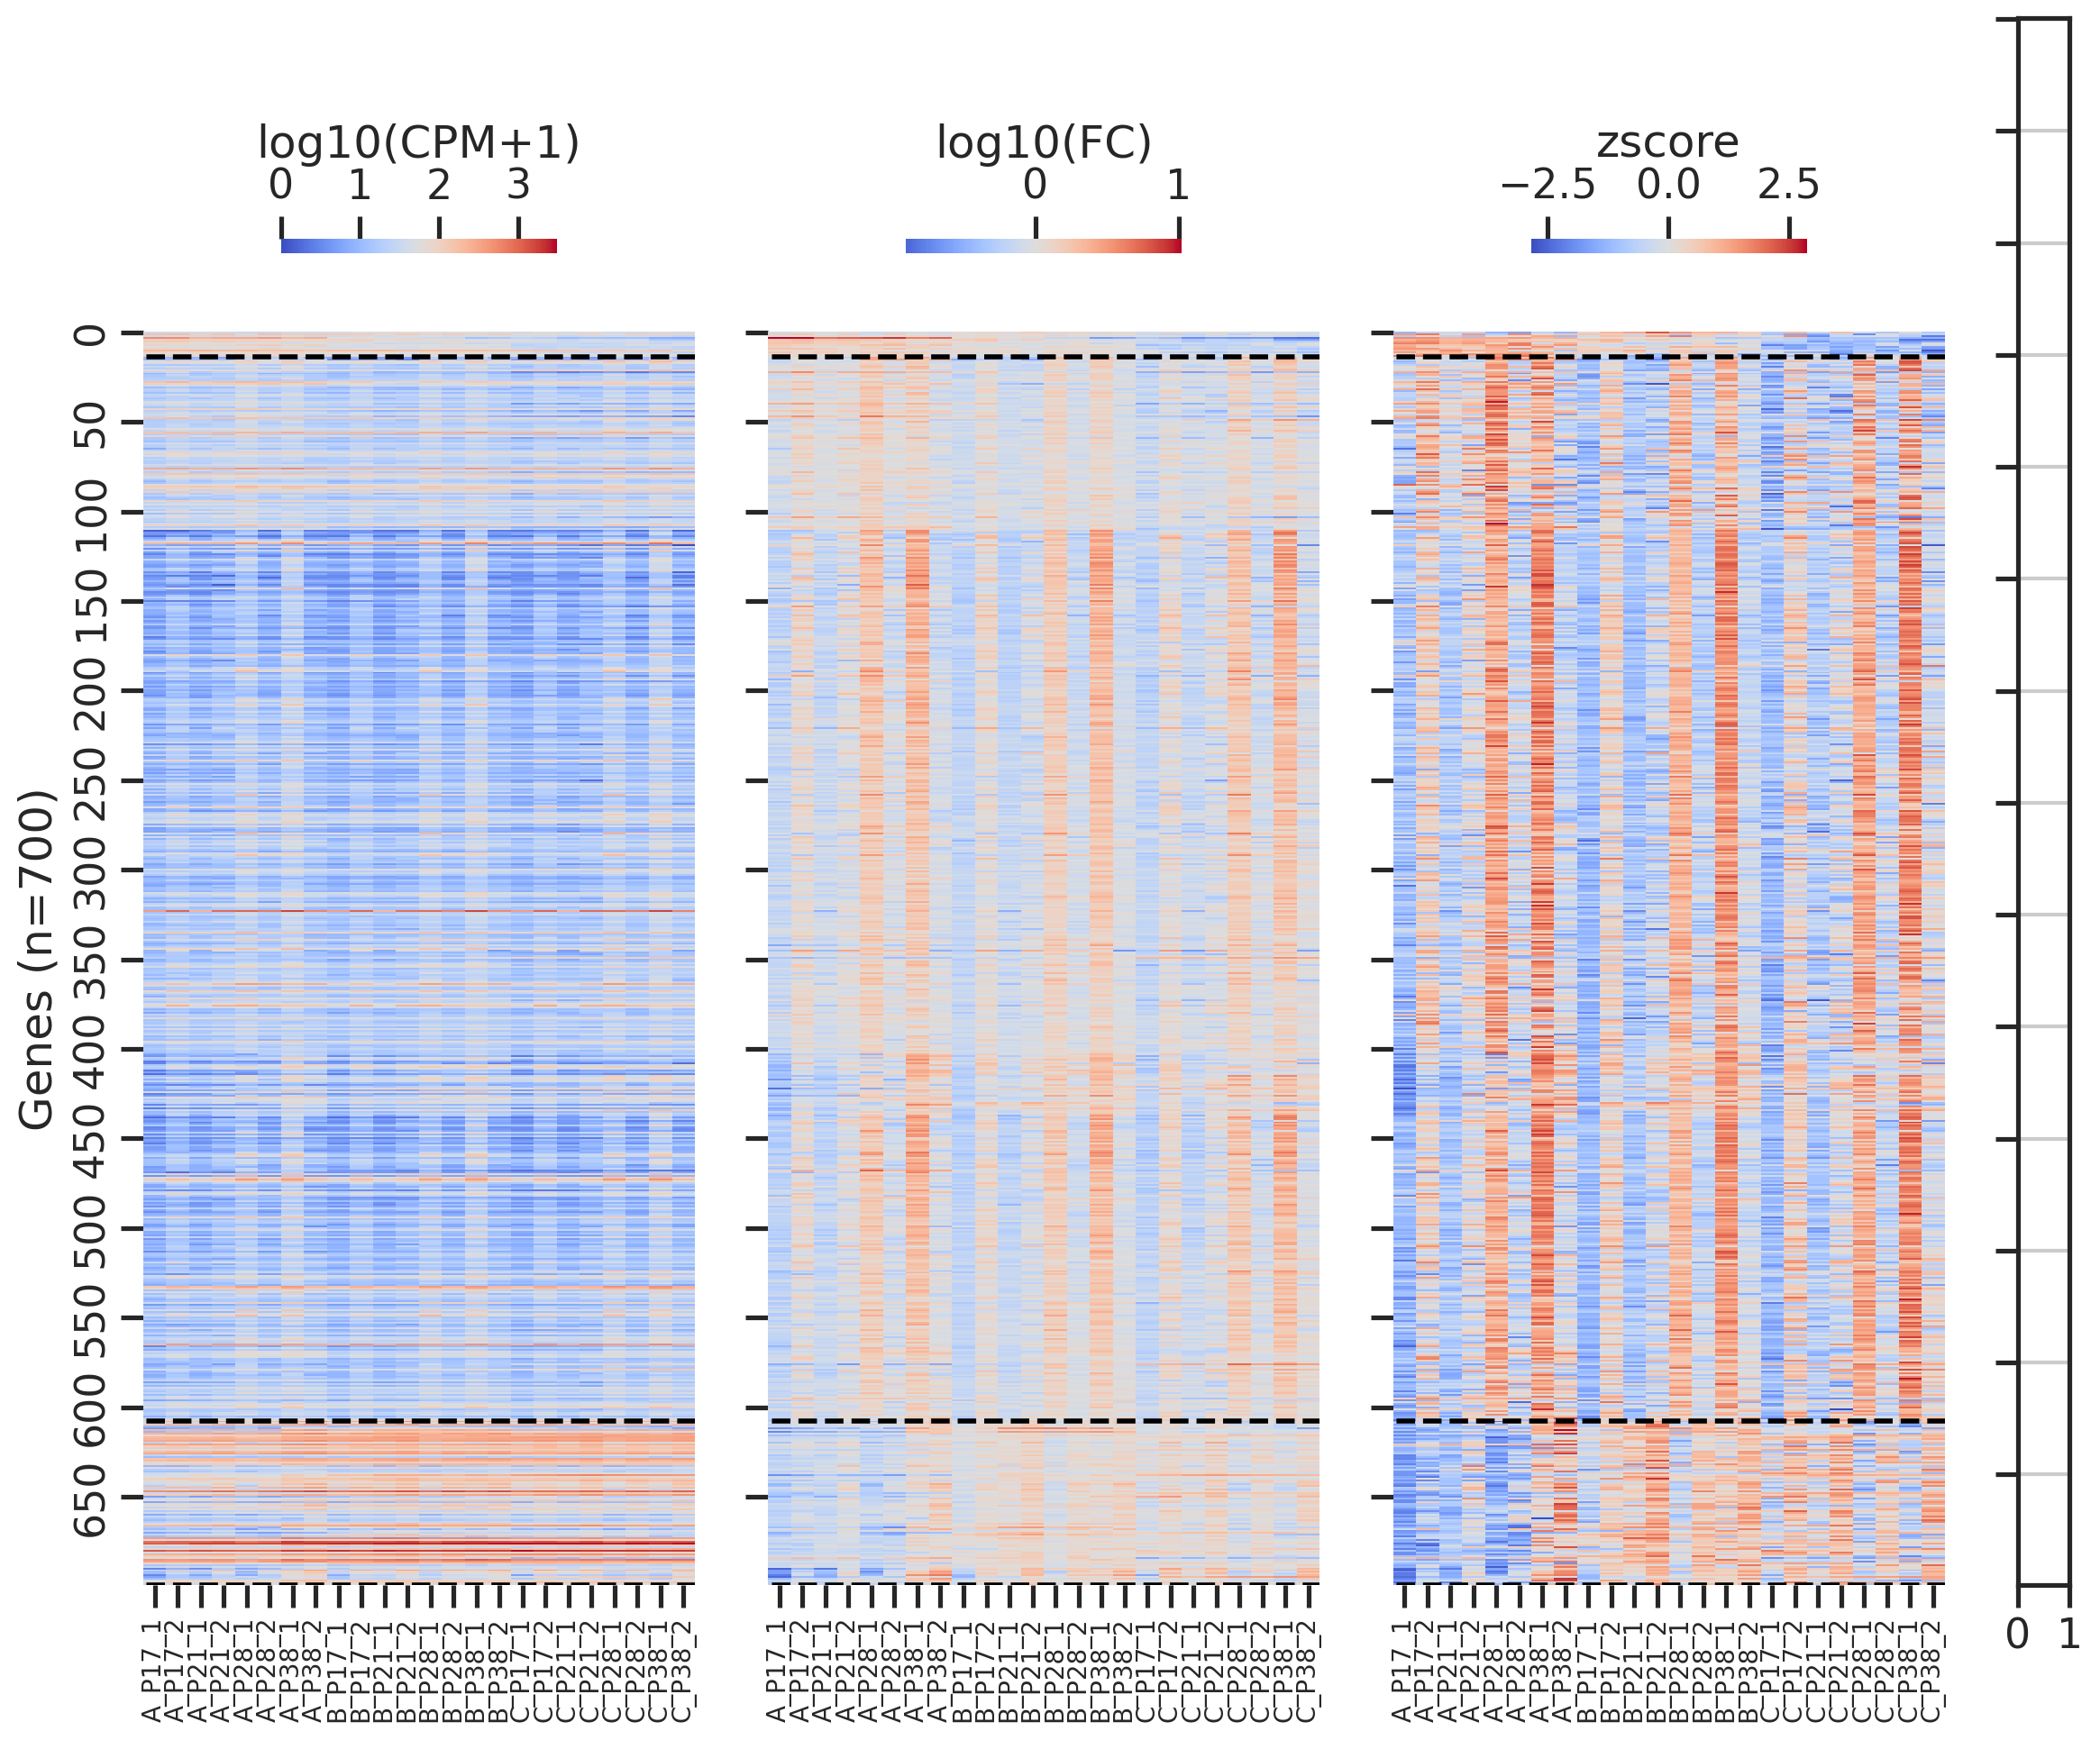

In [34]:
plot_heatmap(pbsub_nr, pbsub_logfc_nr, pbsub_zscore_nr, xlbls_nr)
# plot_heatmap_v2(pbsub_nr[ispicked], pbsub_logfc_nr[ispicked], pbsub_zscore_nr[ispicked], xlbls_nr)

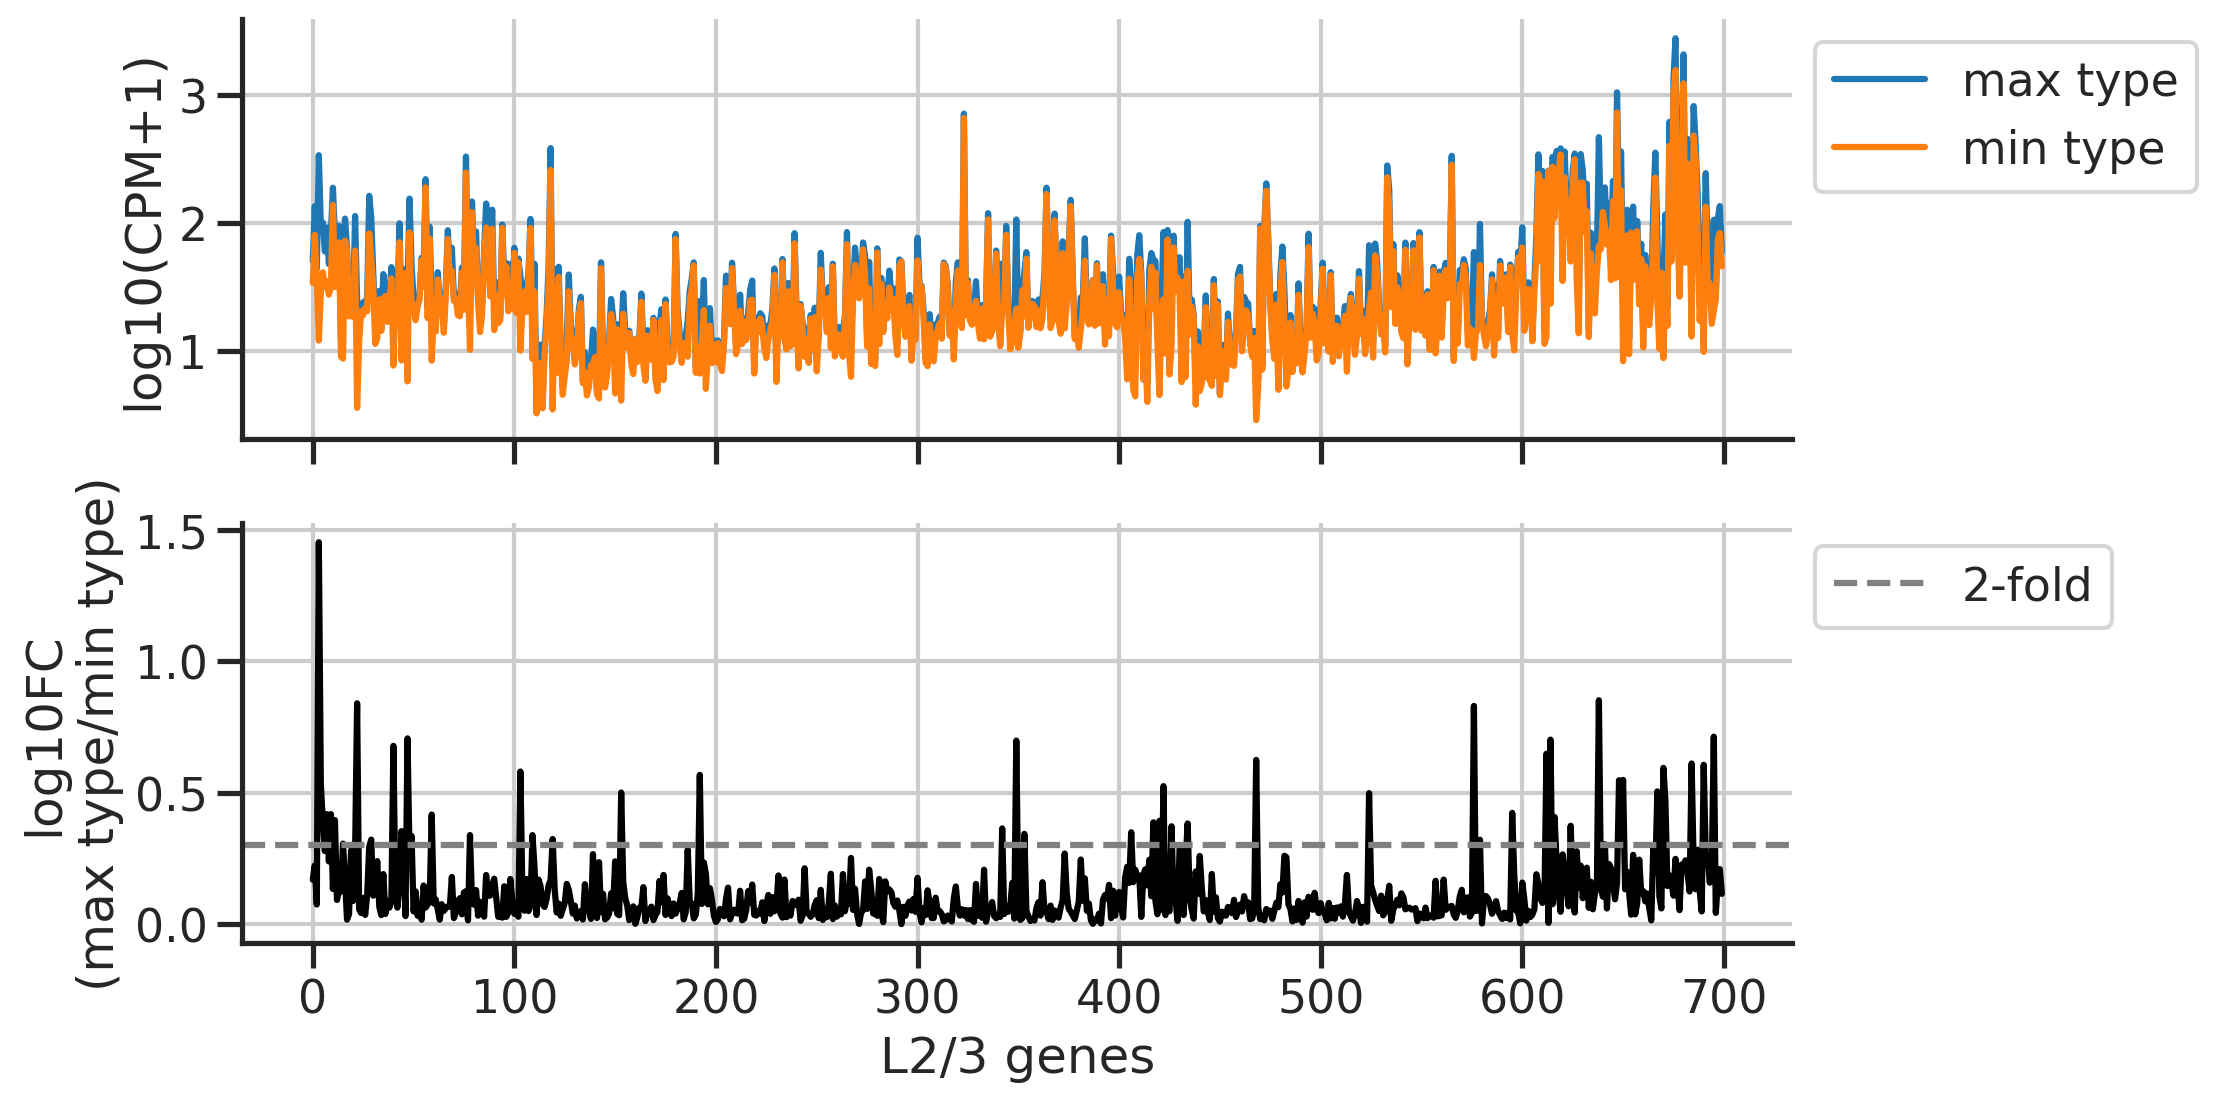

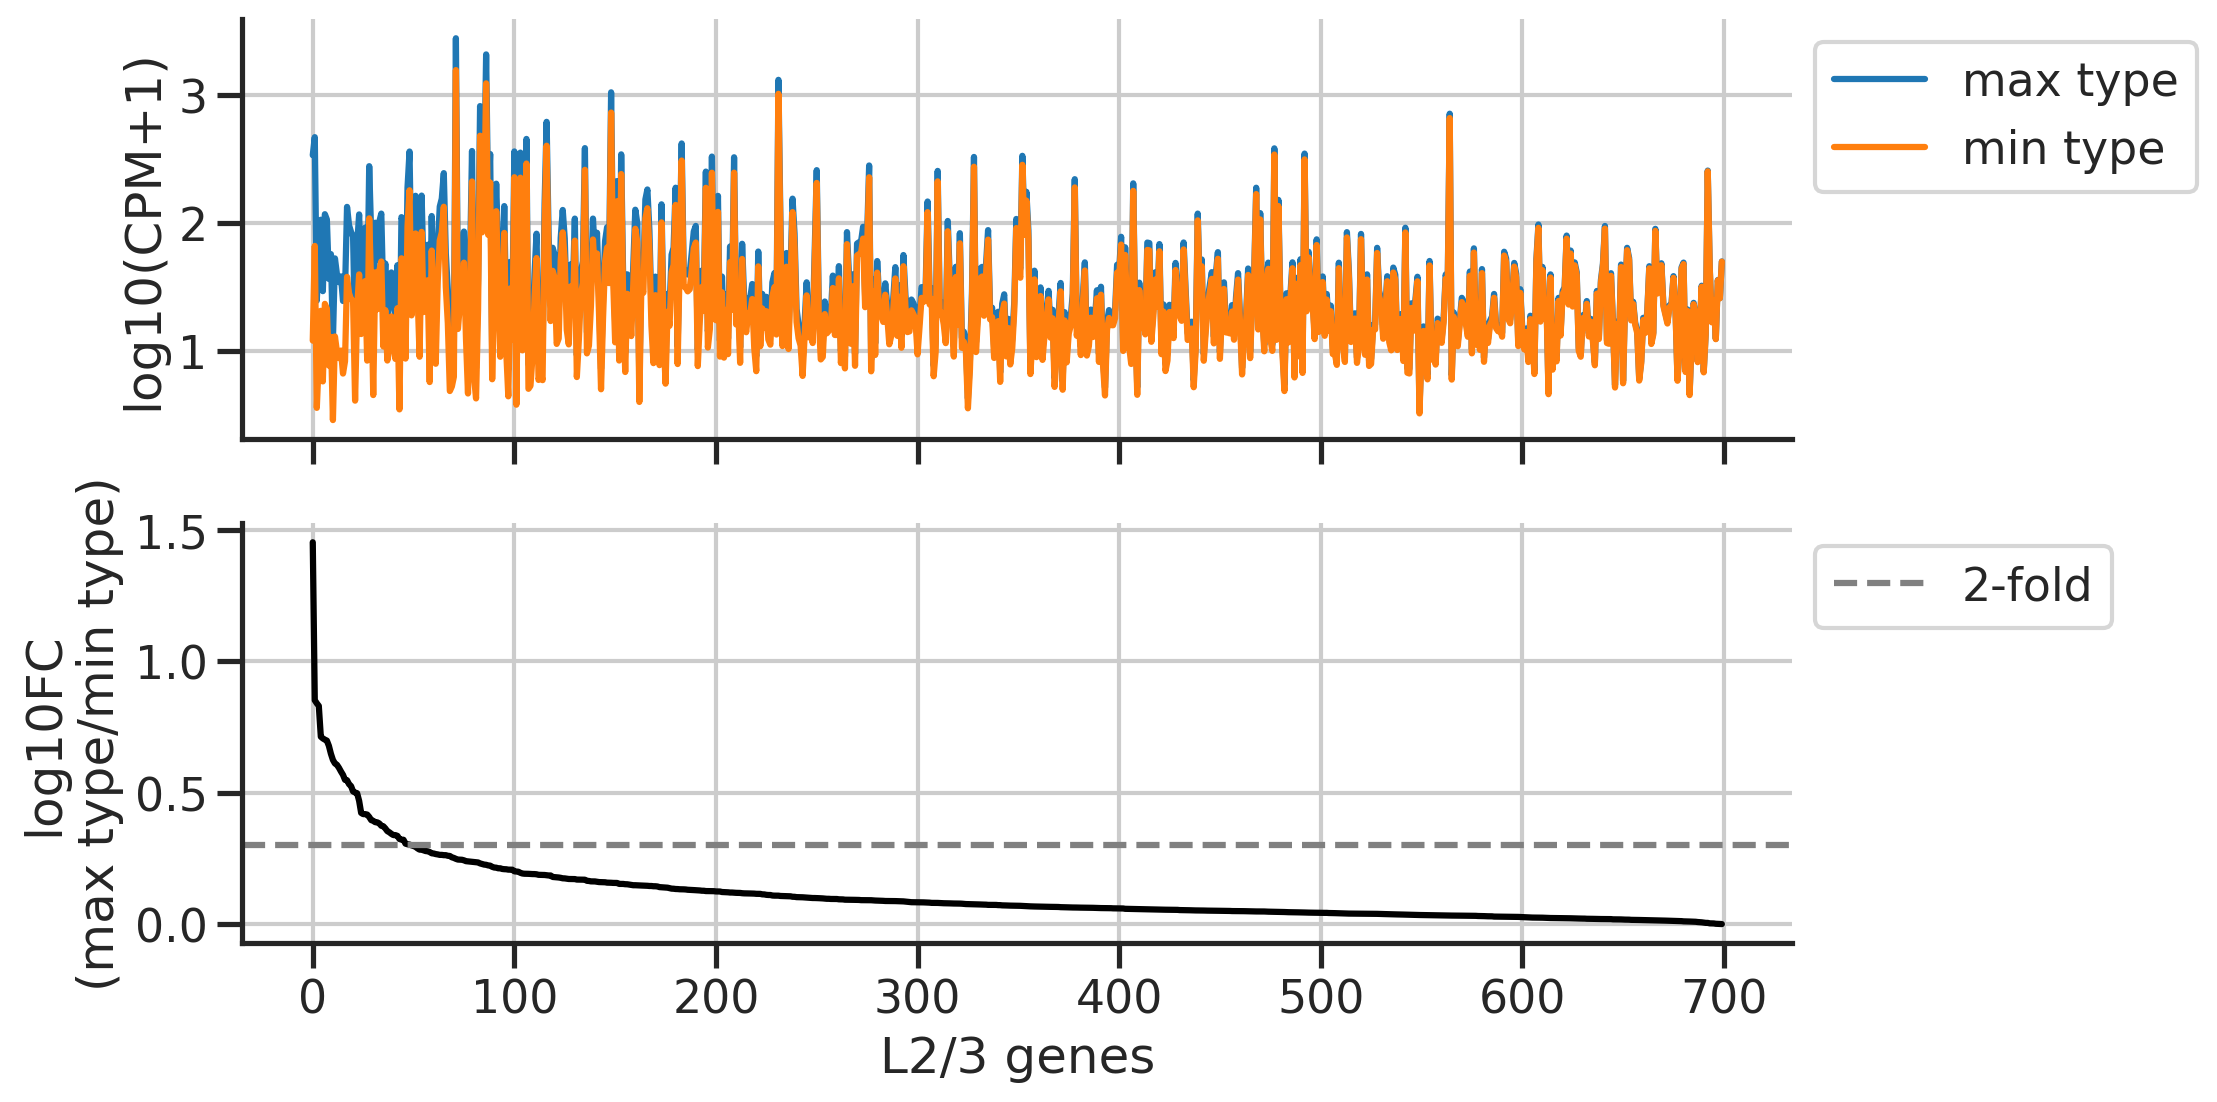

In [35]:
plot_l23genes(maxexp_nr, minexp_nr, lfcexp_nr)
plot_l23genes(maxexp_nr, minexp_nr, lfcexp_nr, order=np.argsort(lfcexp_nr)[::-1])

# Compare everything

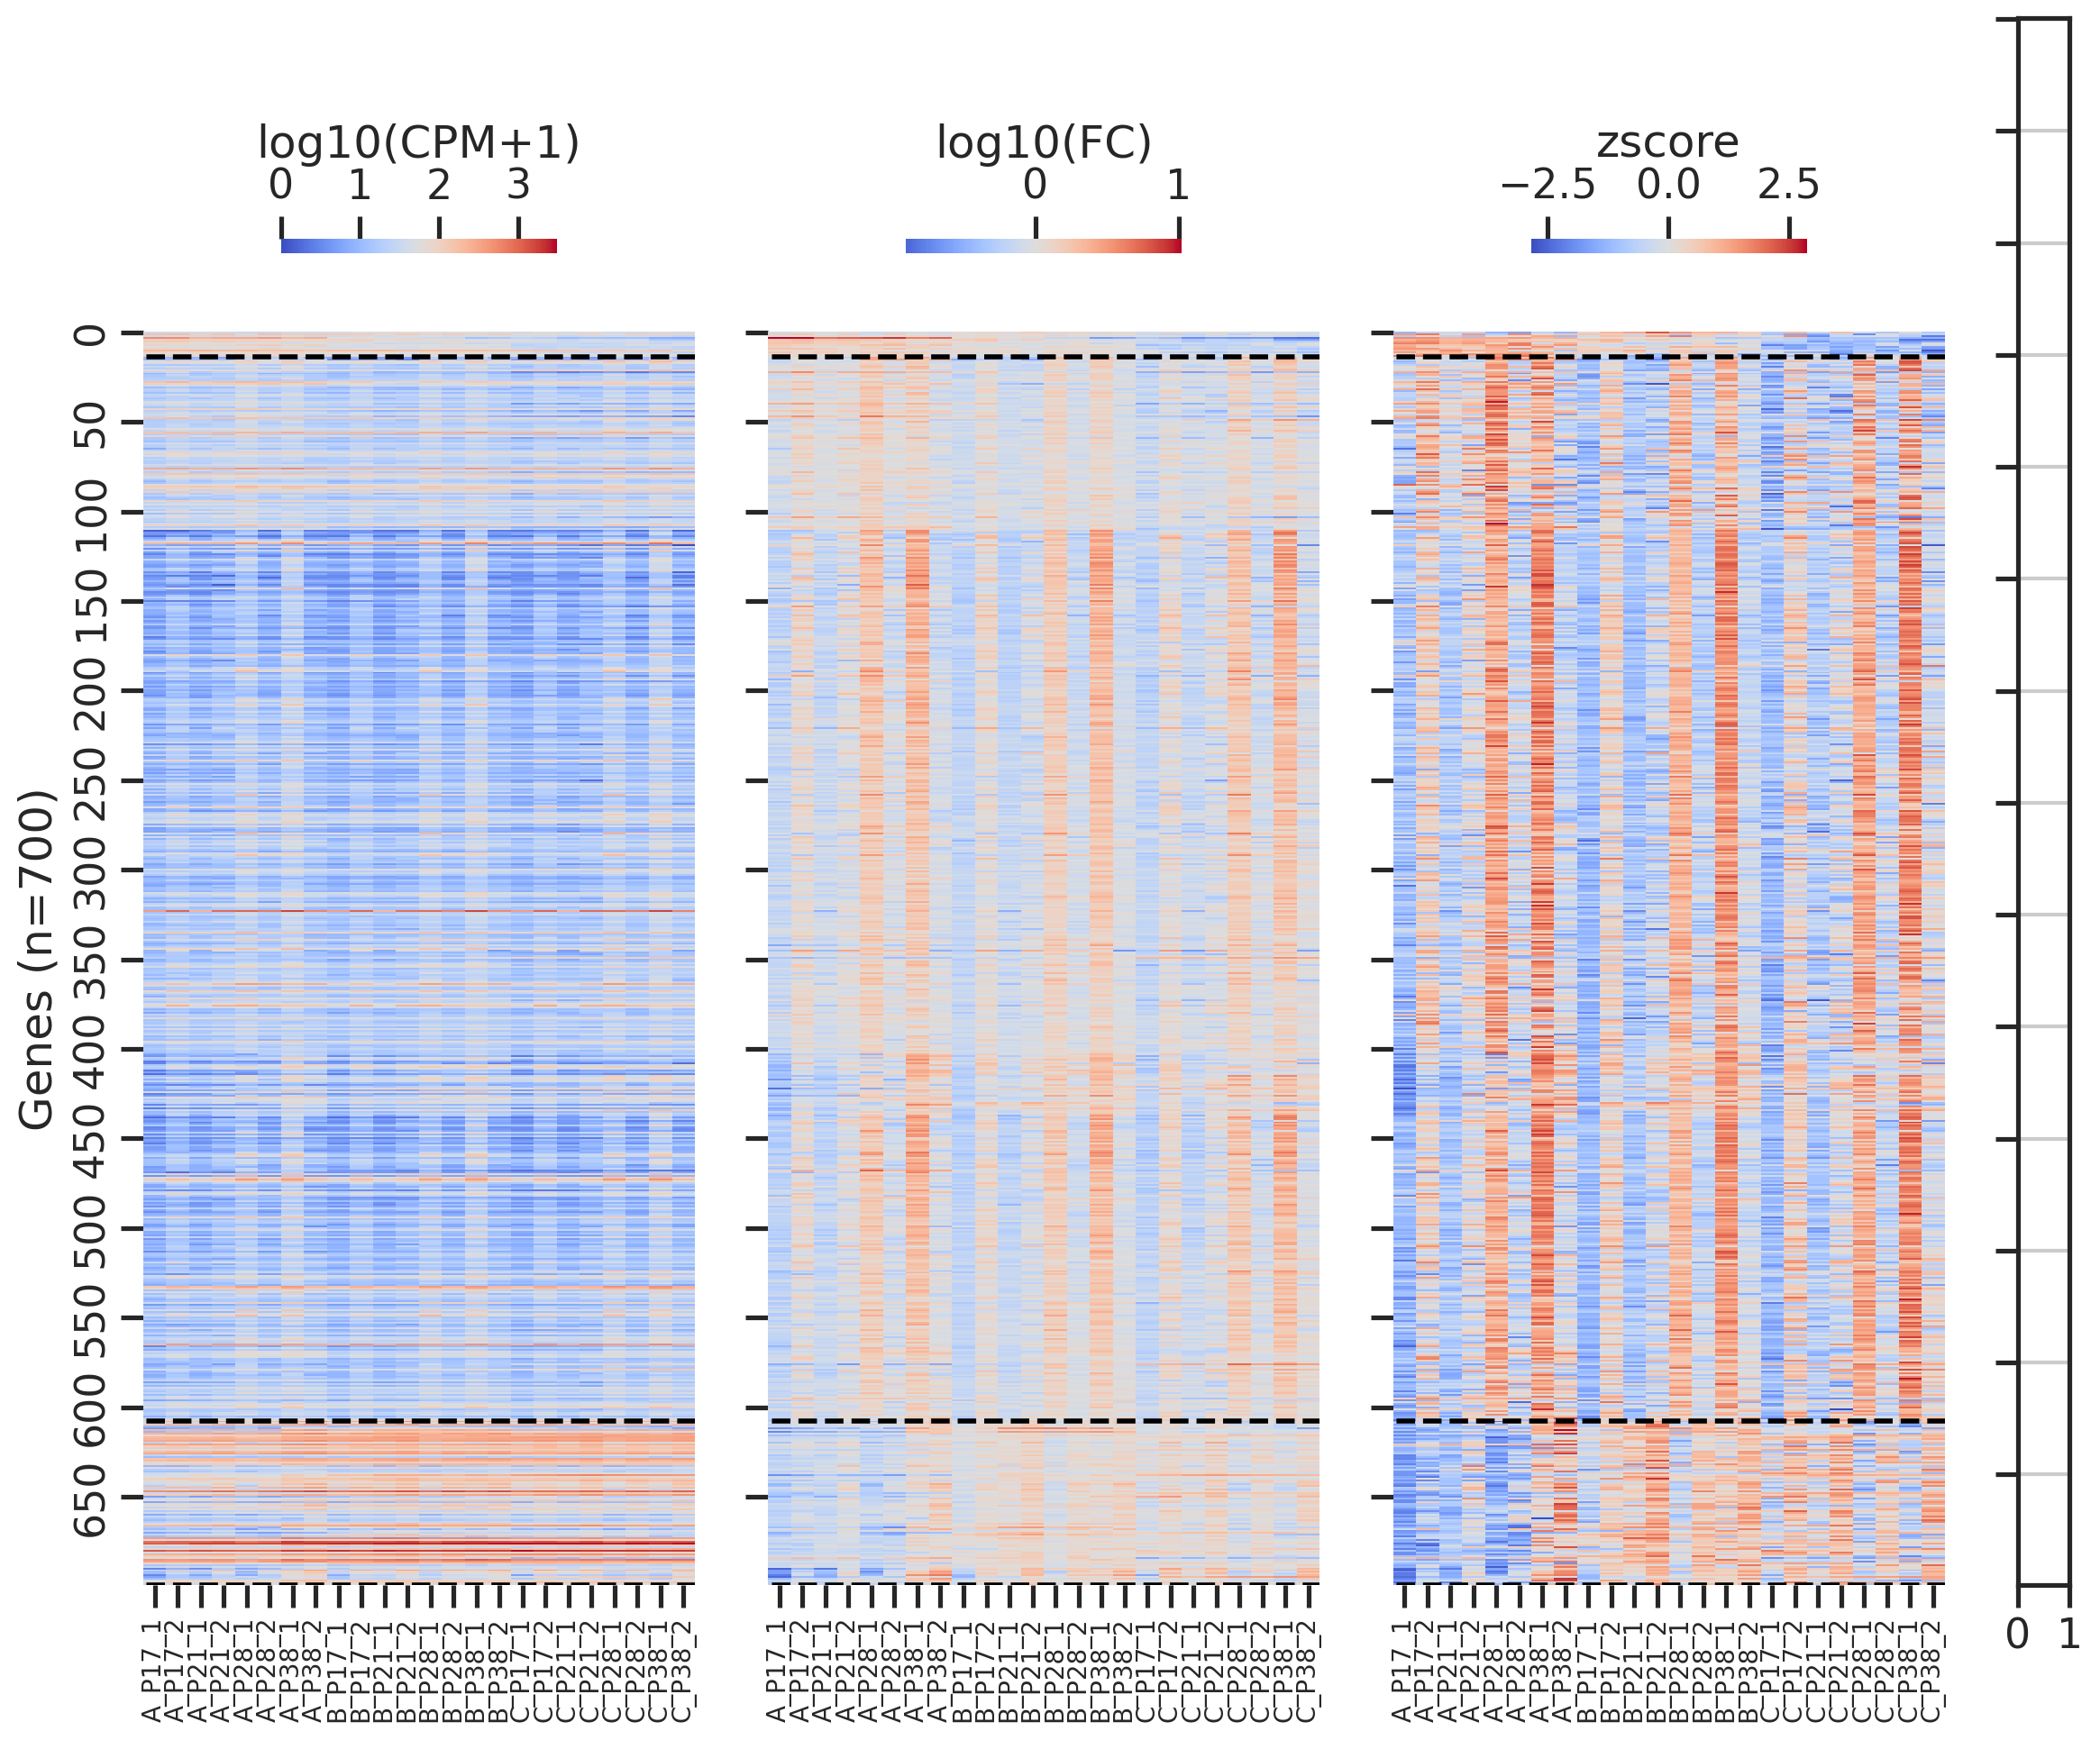

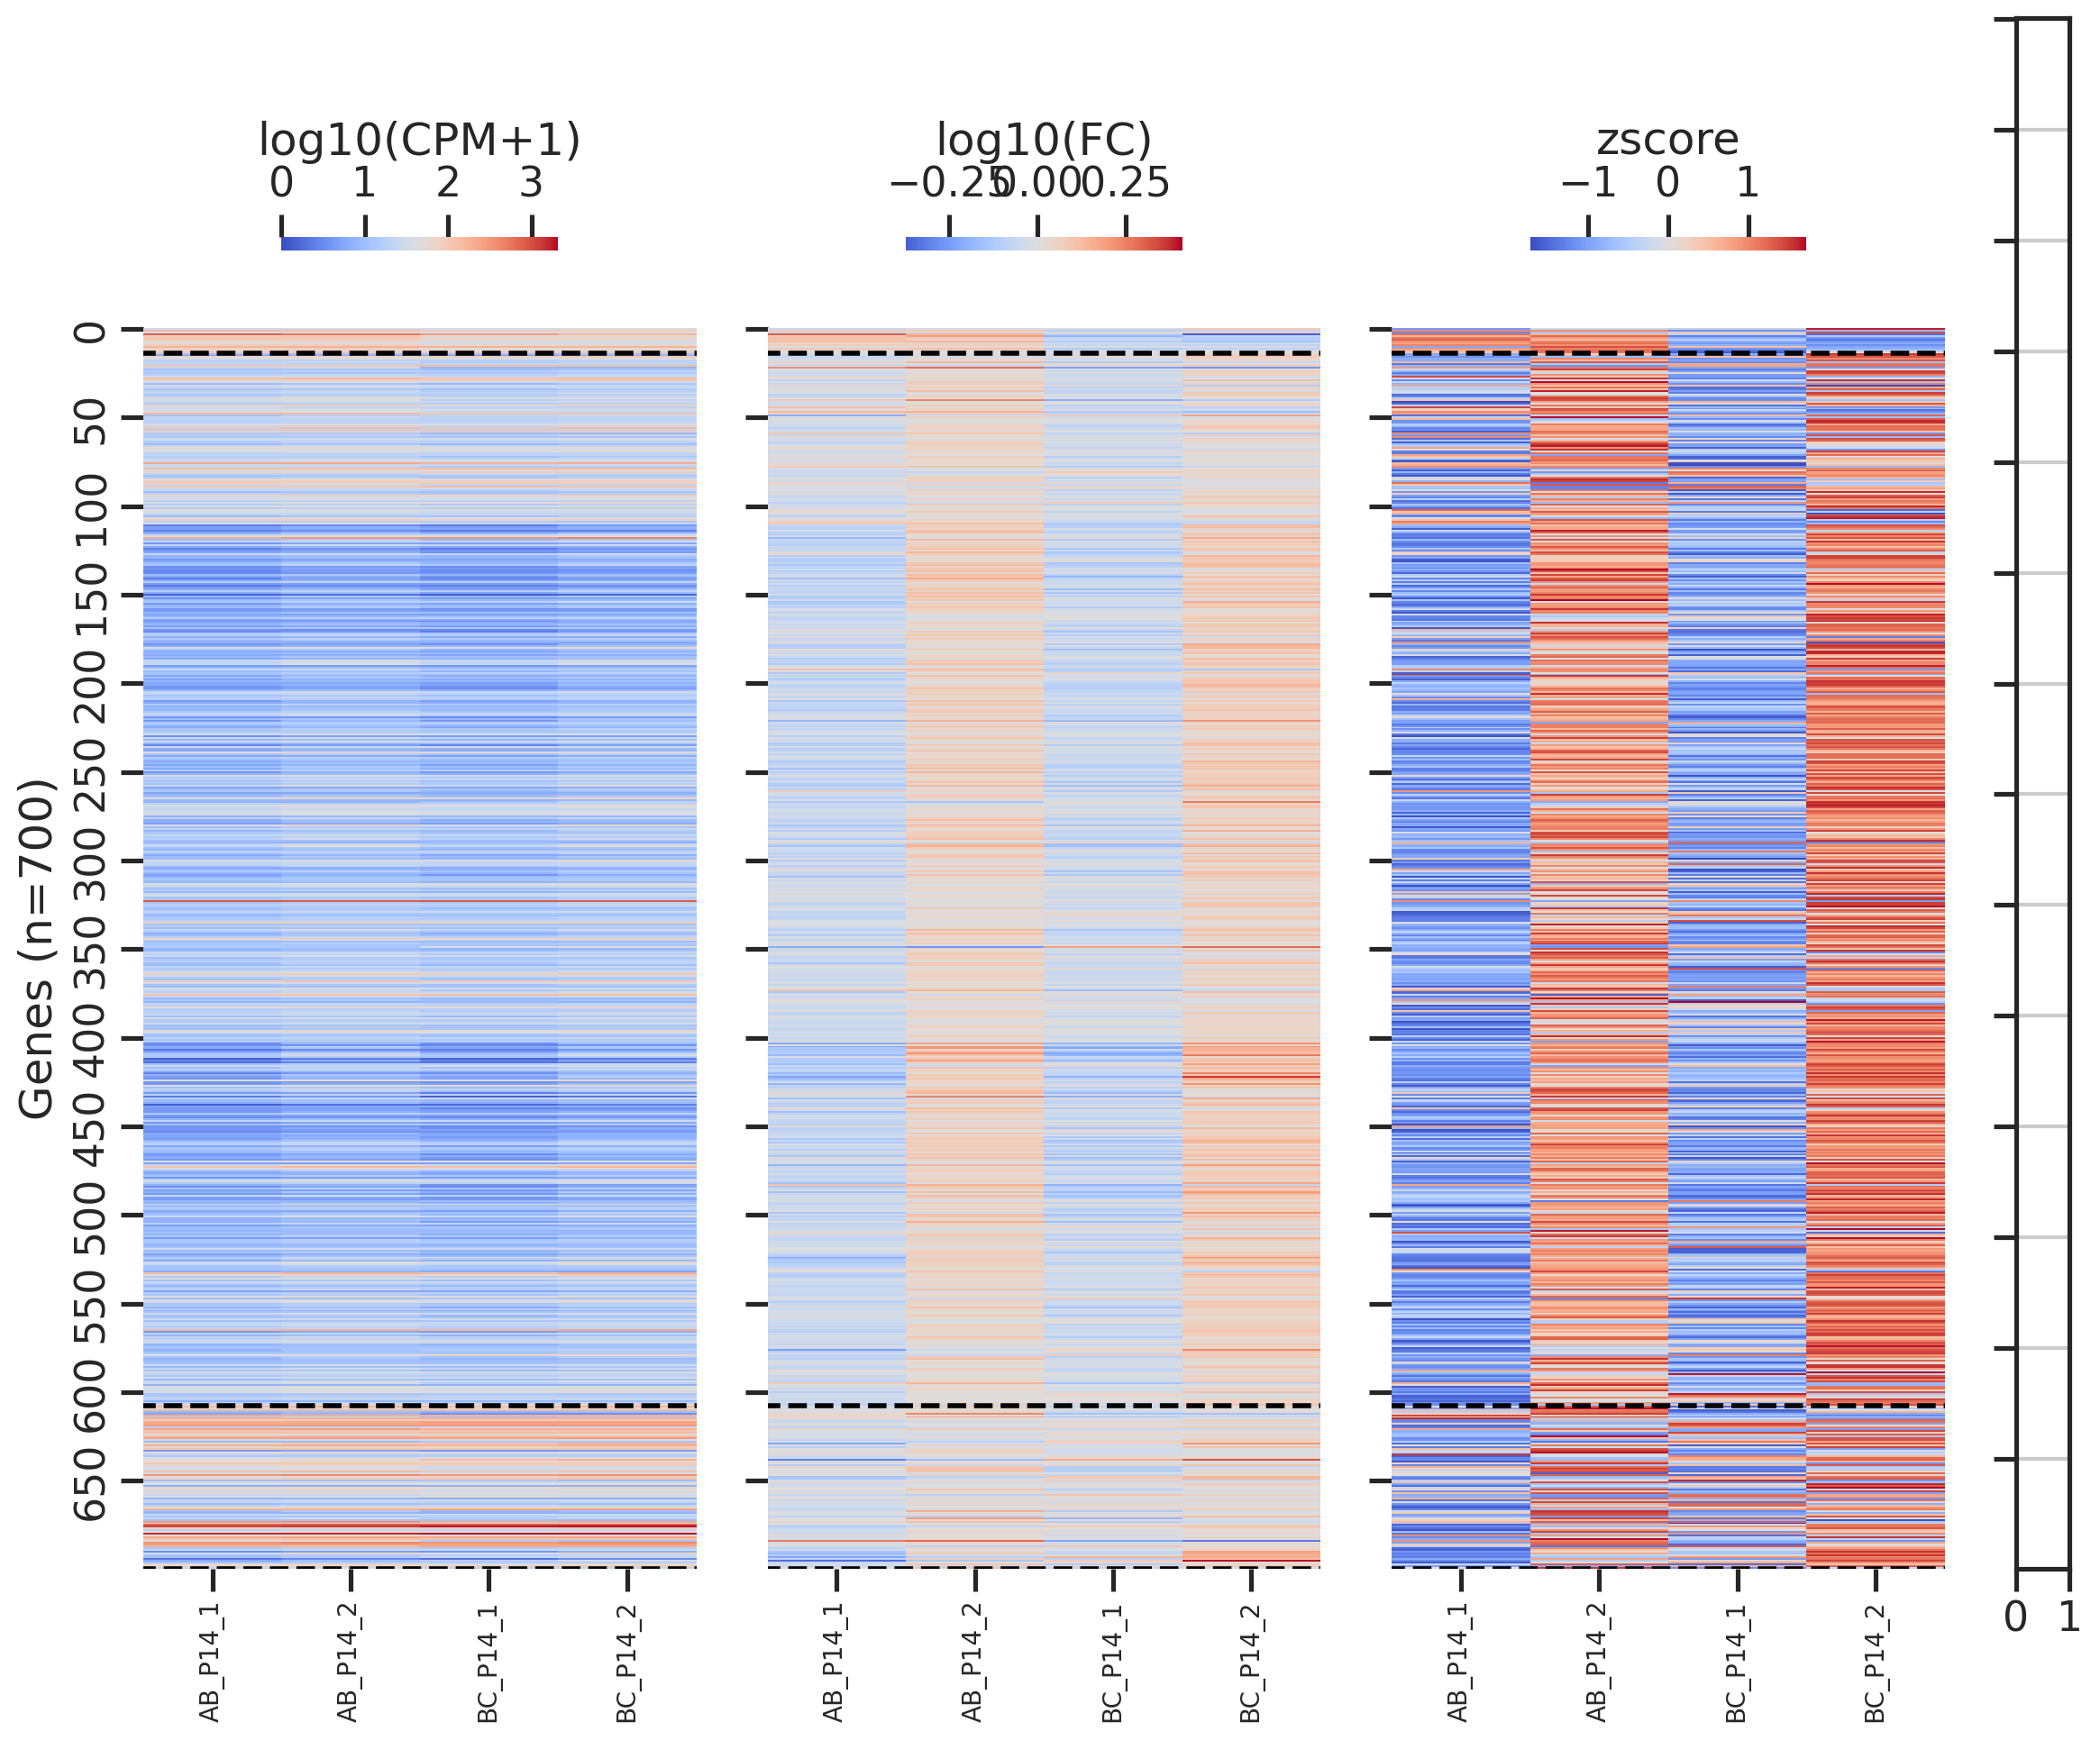

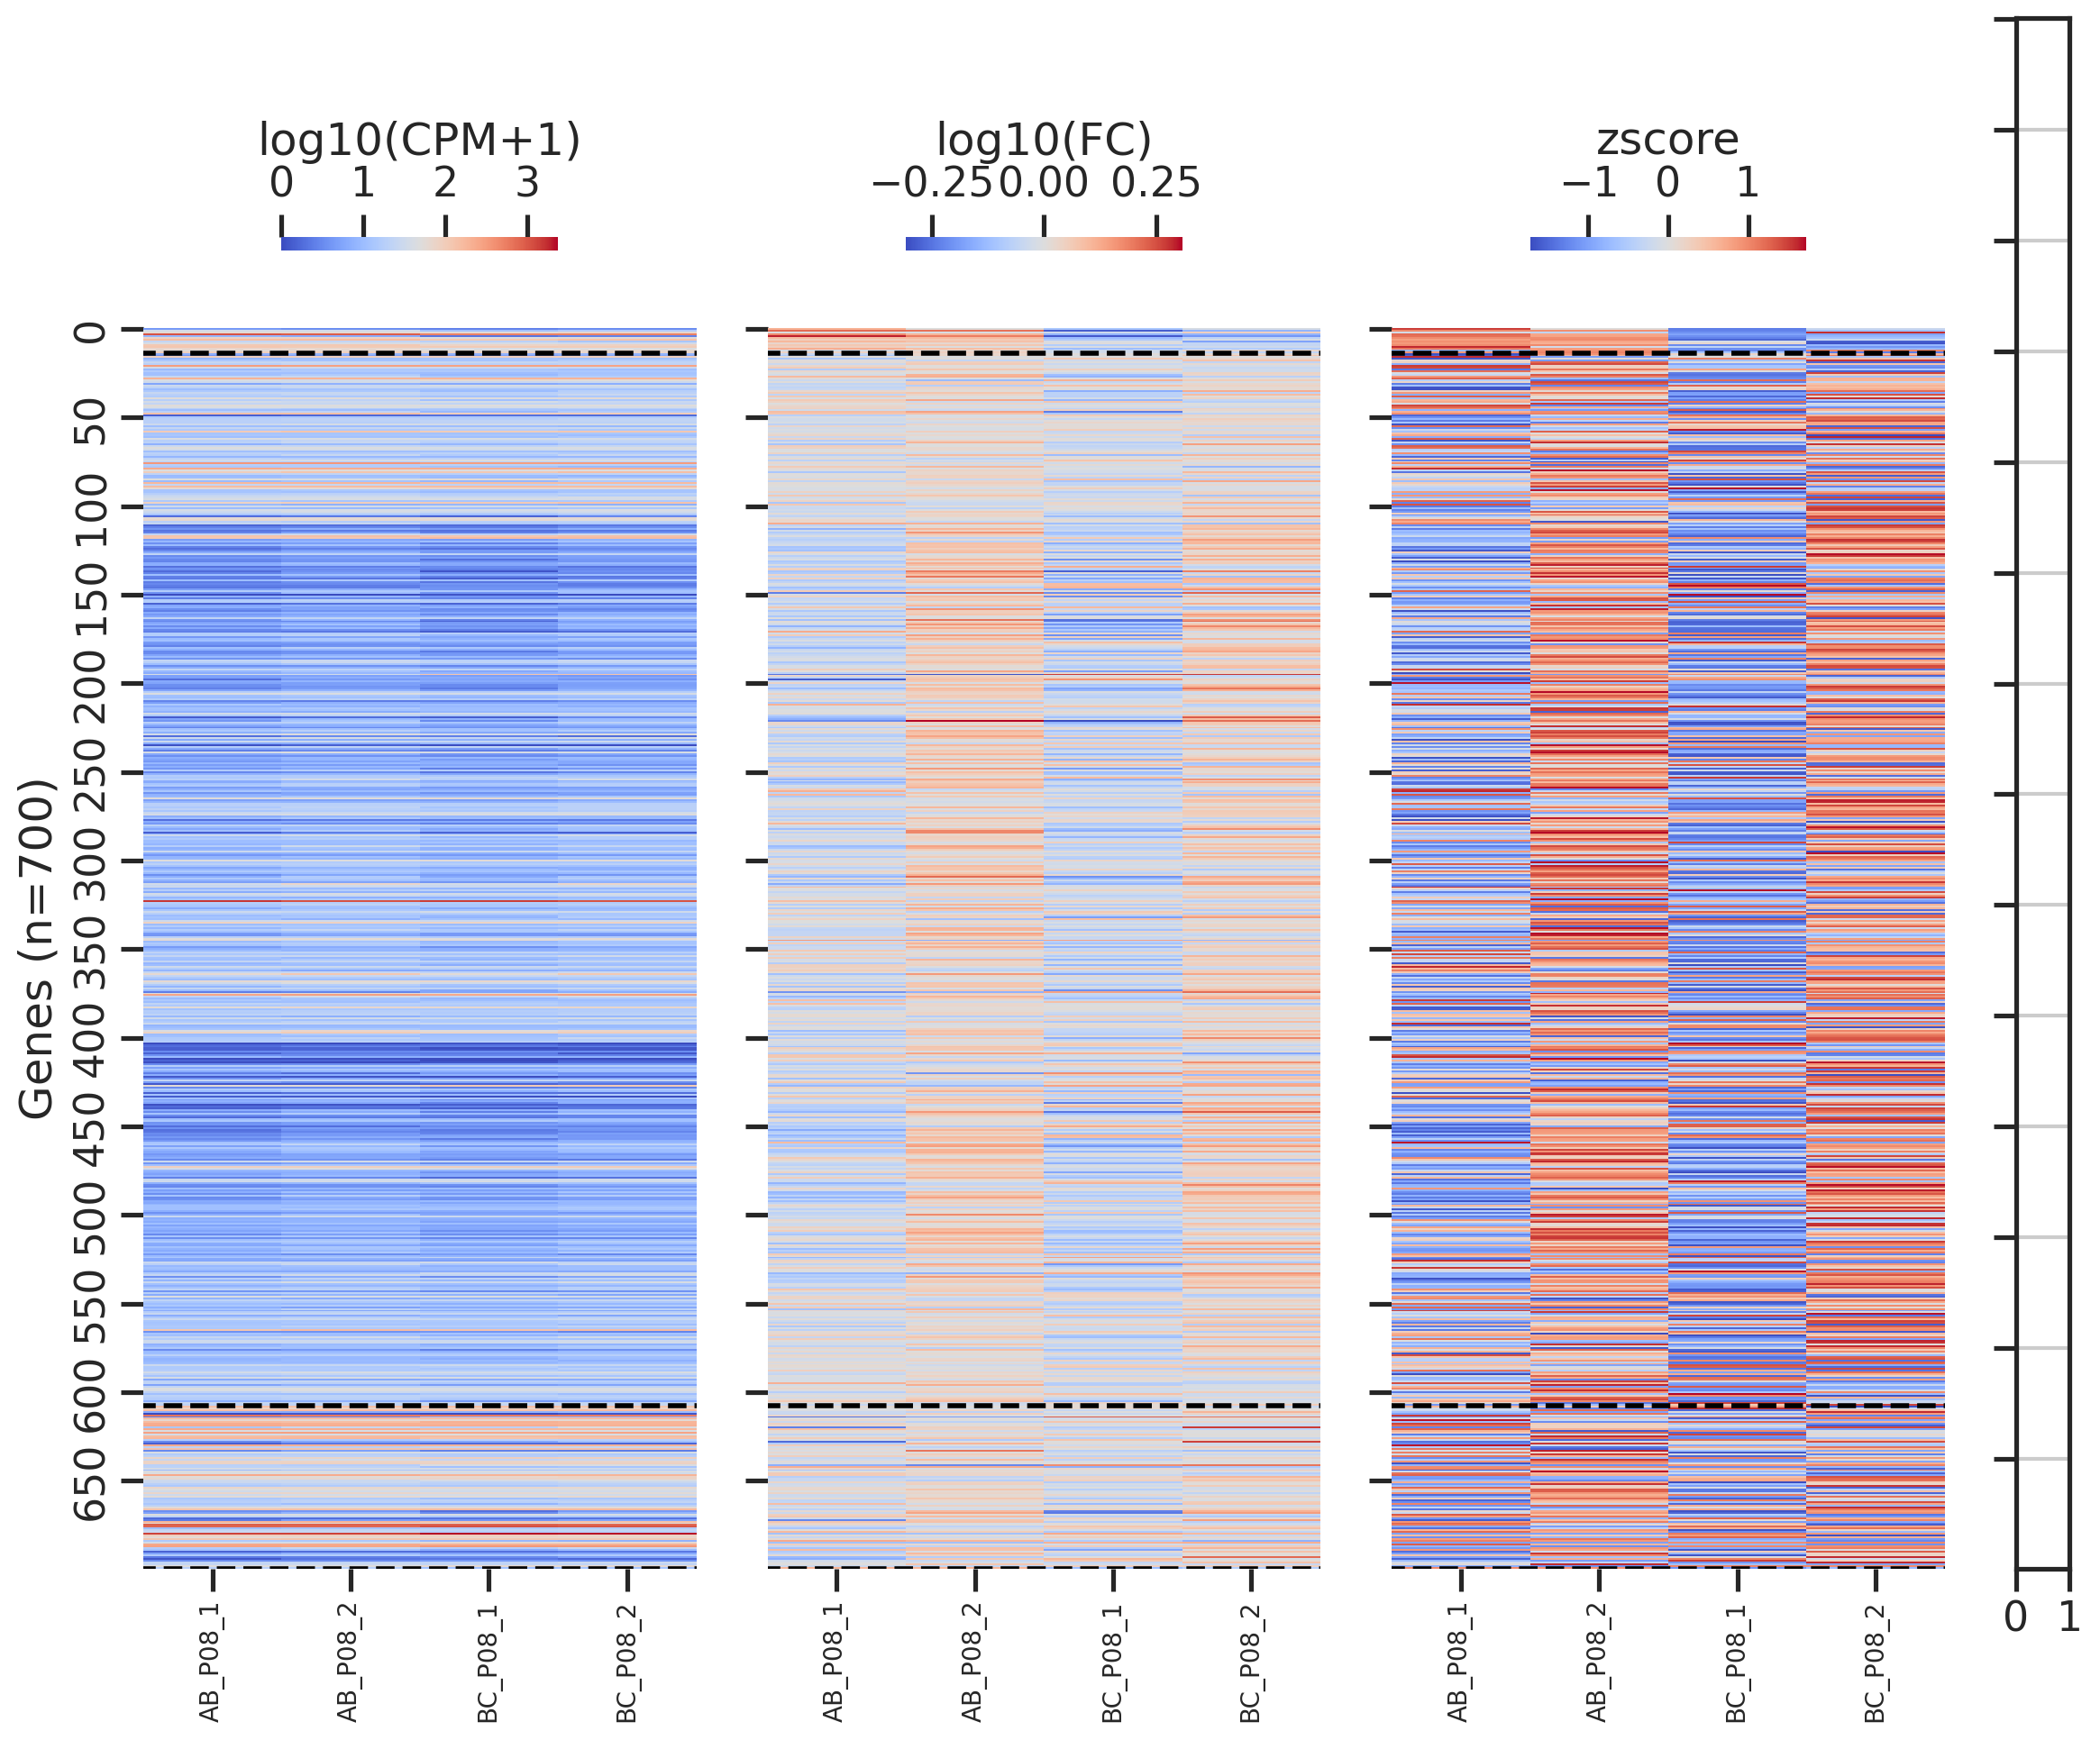

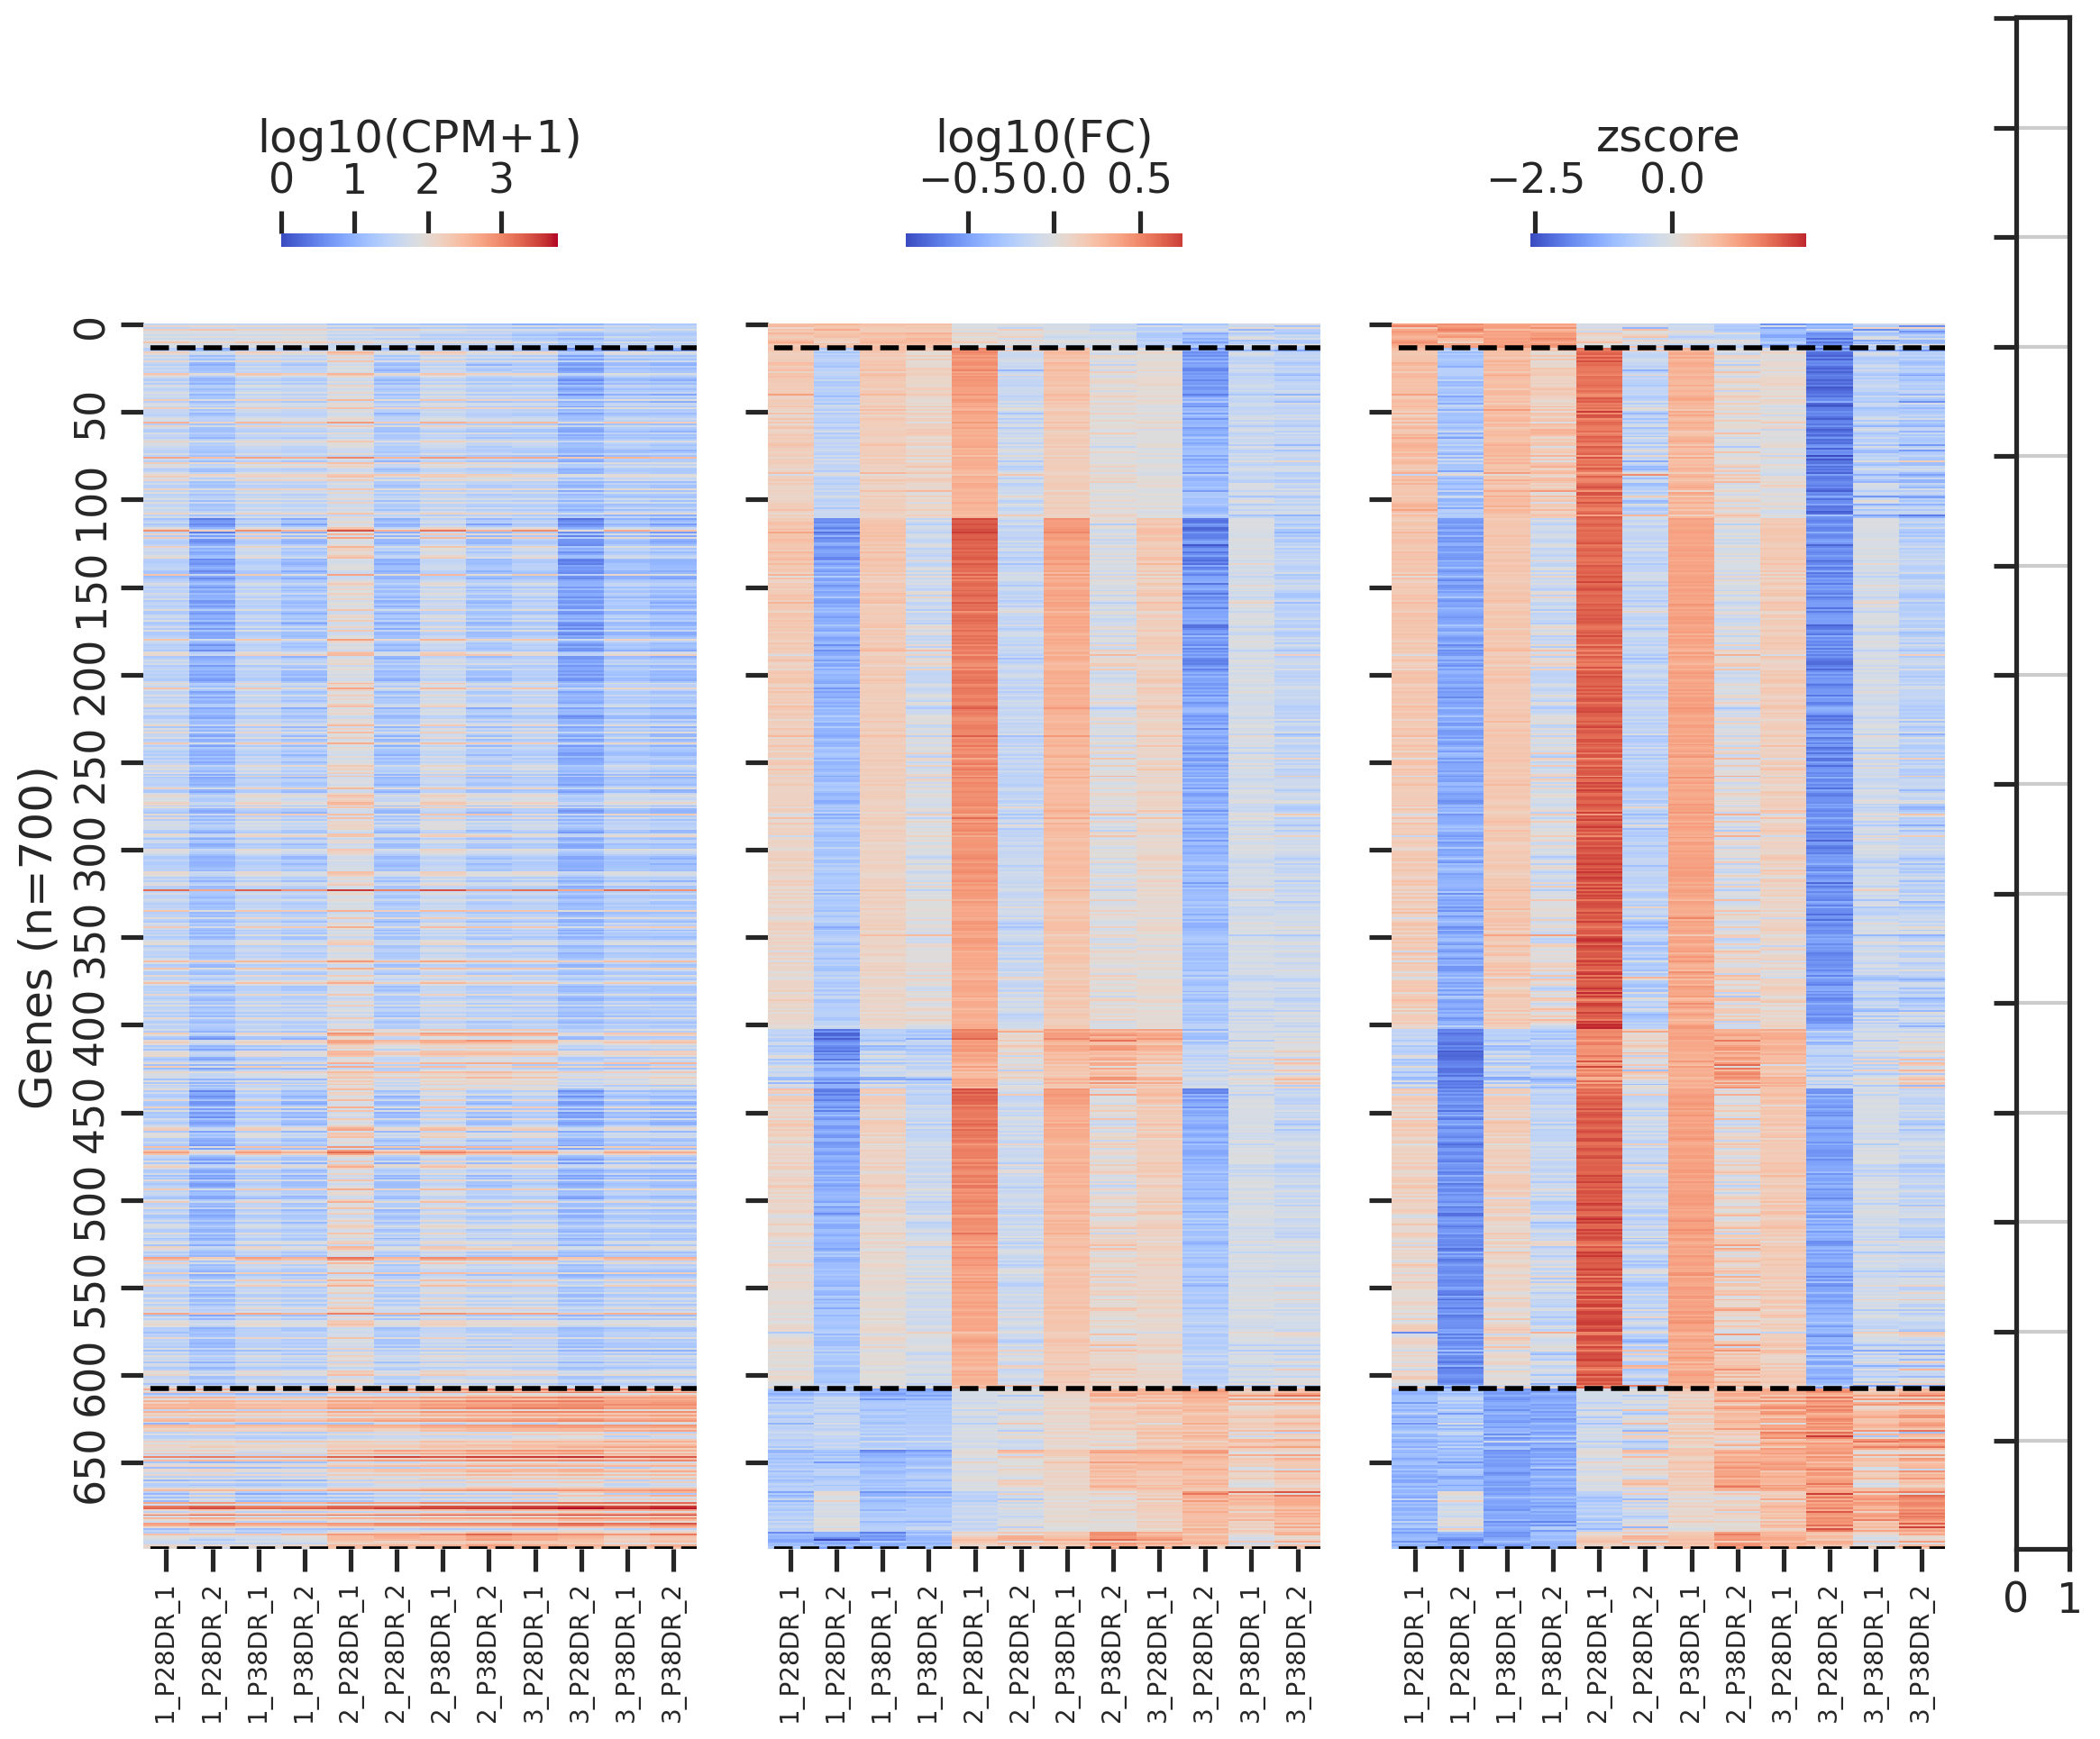

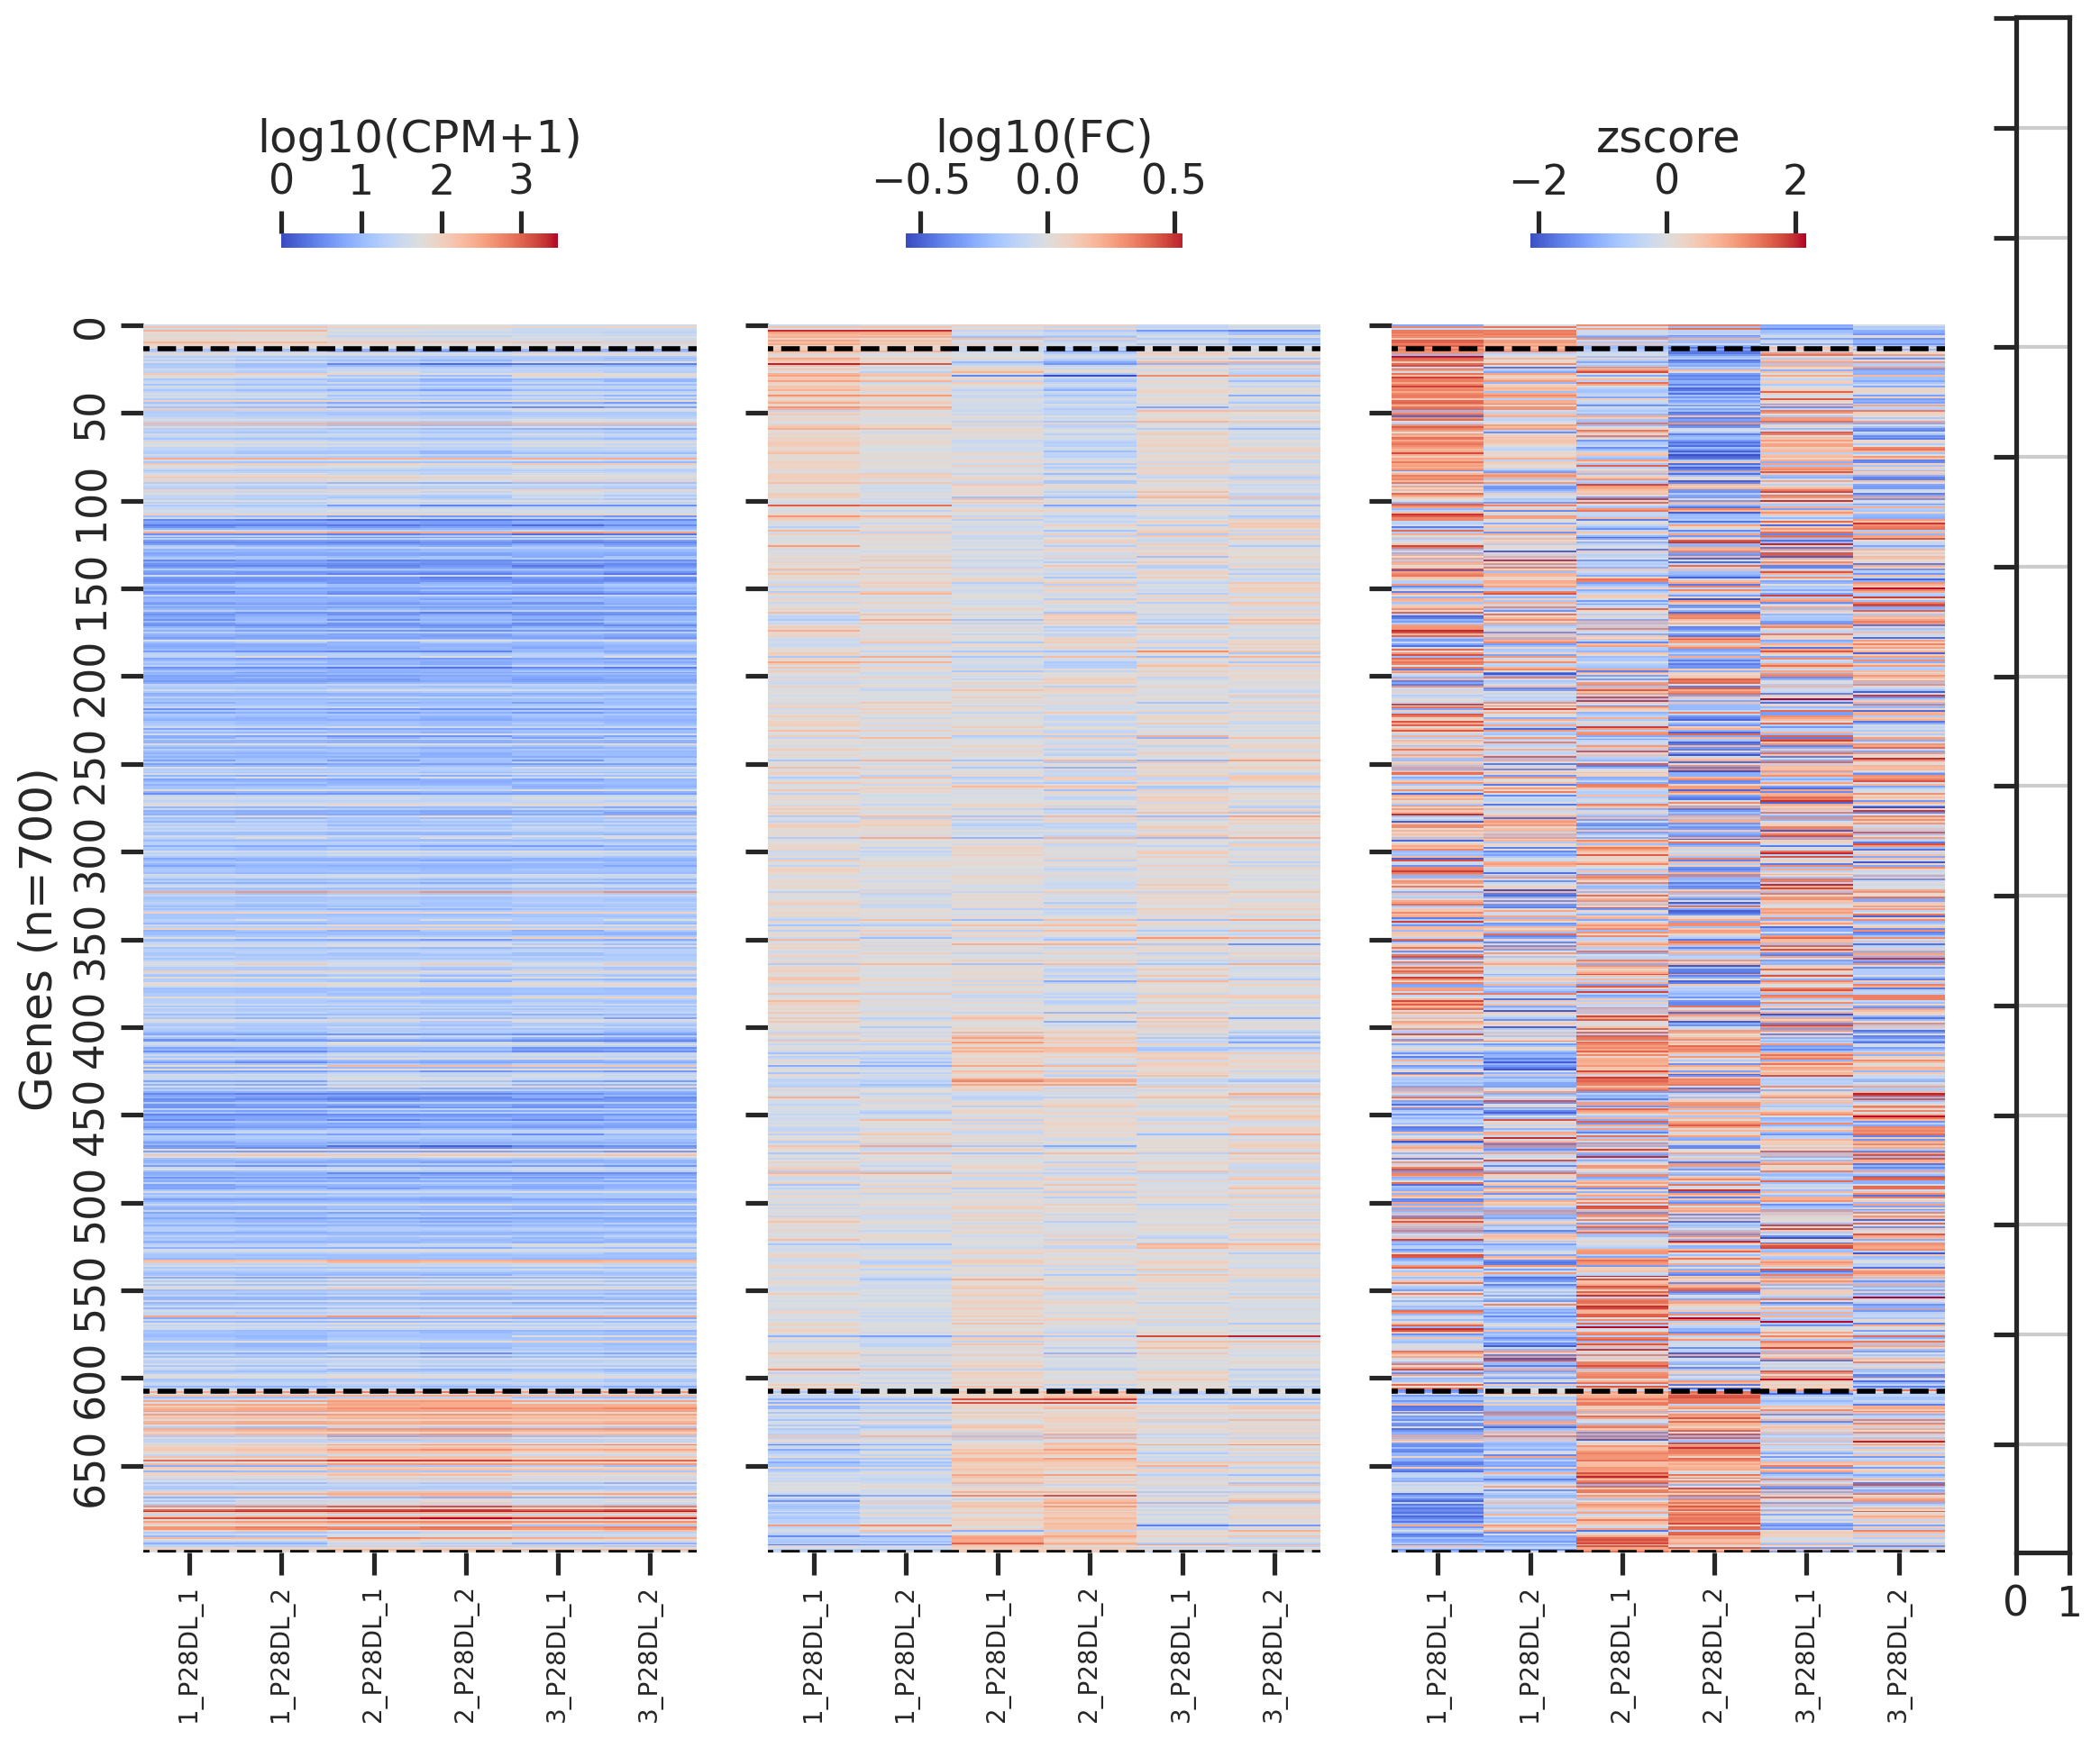

In [36]:
plot_heatmap(pbsub_nr, pbsub_logfc_nr, pbsub_zscore_nr, xlbls_nr)
plot_heatmap(pbsub_14, pbsub_logfc_14, pbsub_zscore_14, xlbls_14)
plot_heatmap(pbsub_08, pbsub_logfc_08, pbsub_zscore_08, xlbls_08)
plot_heatmap(pbsub_dr, pbsub_logfc_dr, pbsub_zscore_dr, xlbls_dr)
plot_heatmap(pbsub_dl, pbsub_logfc_dl, pbsub_zscore_dl, xlbls_dl)

In [37]:
colors = sns.color_palette('tab20', 5)
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)]

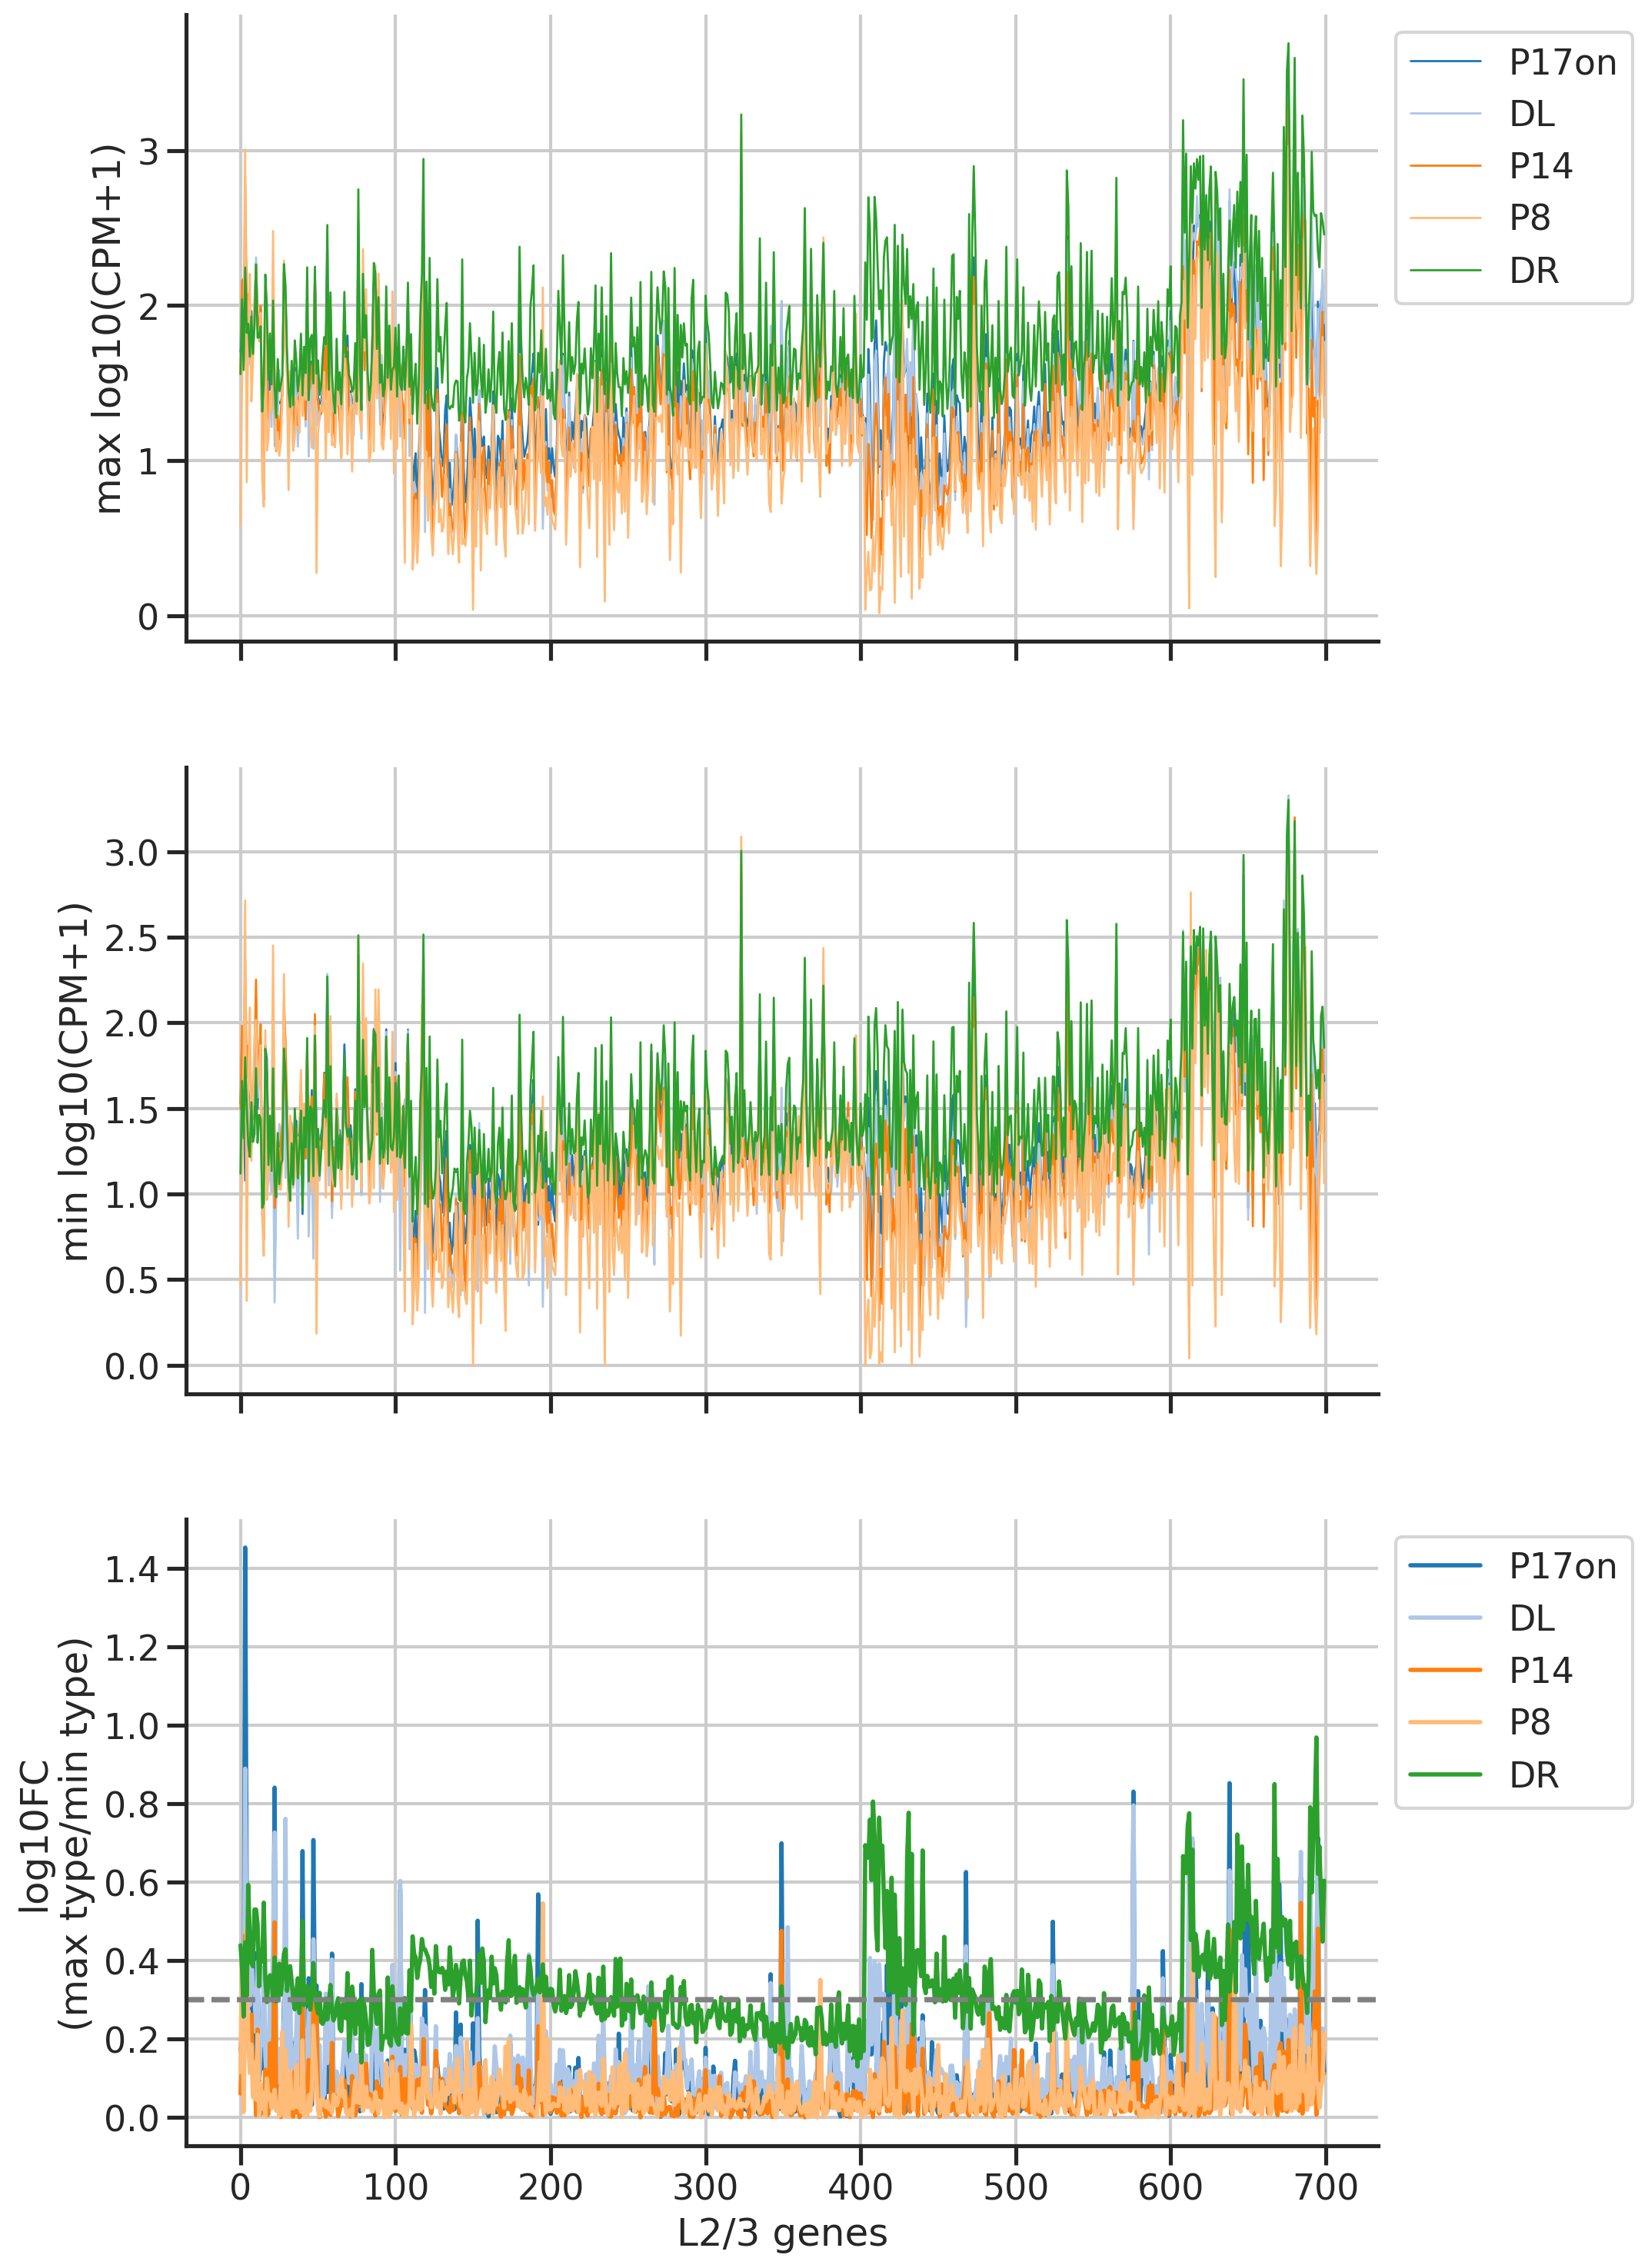

In [38]:
fig, axs = plt.subplots(3,1,figsize=(1*10,3*6), sharex=True)
plot_l23genes_v2(maxexp_nr, minexp_nr, lfcexp_nr, axs=axs, color=colors[0], lbl='P17on')
plot_l23genes_v2(maxexp_dl, minexp_dl, lfcexp_dl, axs=axs, color=colors[1], lbl='DL')
plot_l23genes_v2(maxexp_14, minexp_14, lfcexp_14, axs=axs, color=colors[2], lbl='P14')
plot_l23genes_v2(maxexp_08, minexp_08, lfcexp_08, axs=axs, color=colors[3], lbl='P8')
plot_l23genes_v2(maxexp_dr, minexp_dr, lfcexp_dr, axs=axs, color=colors[4], lbl='DR')
plt.show()

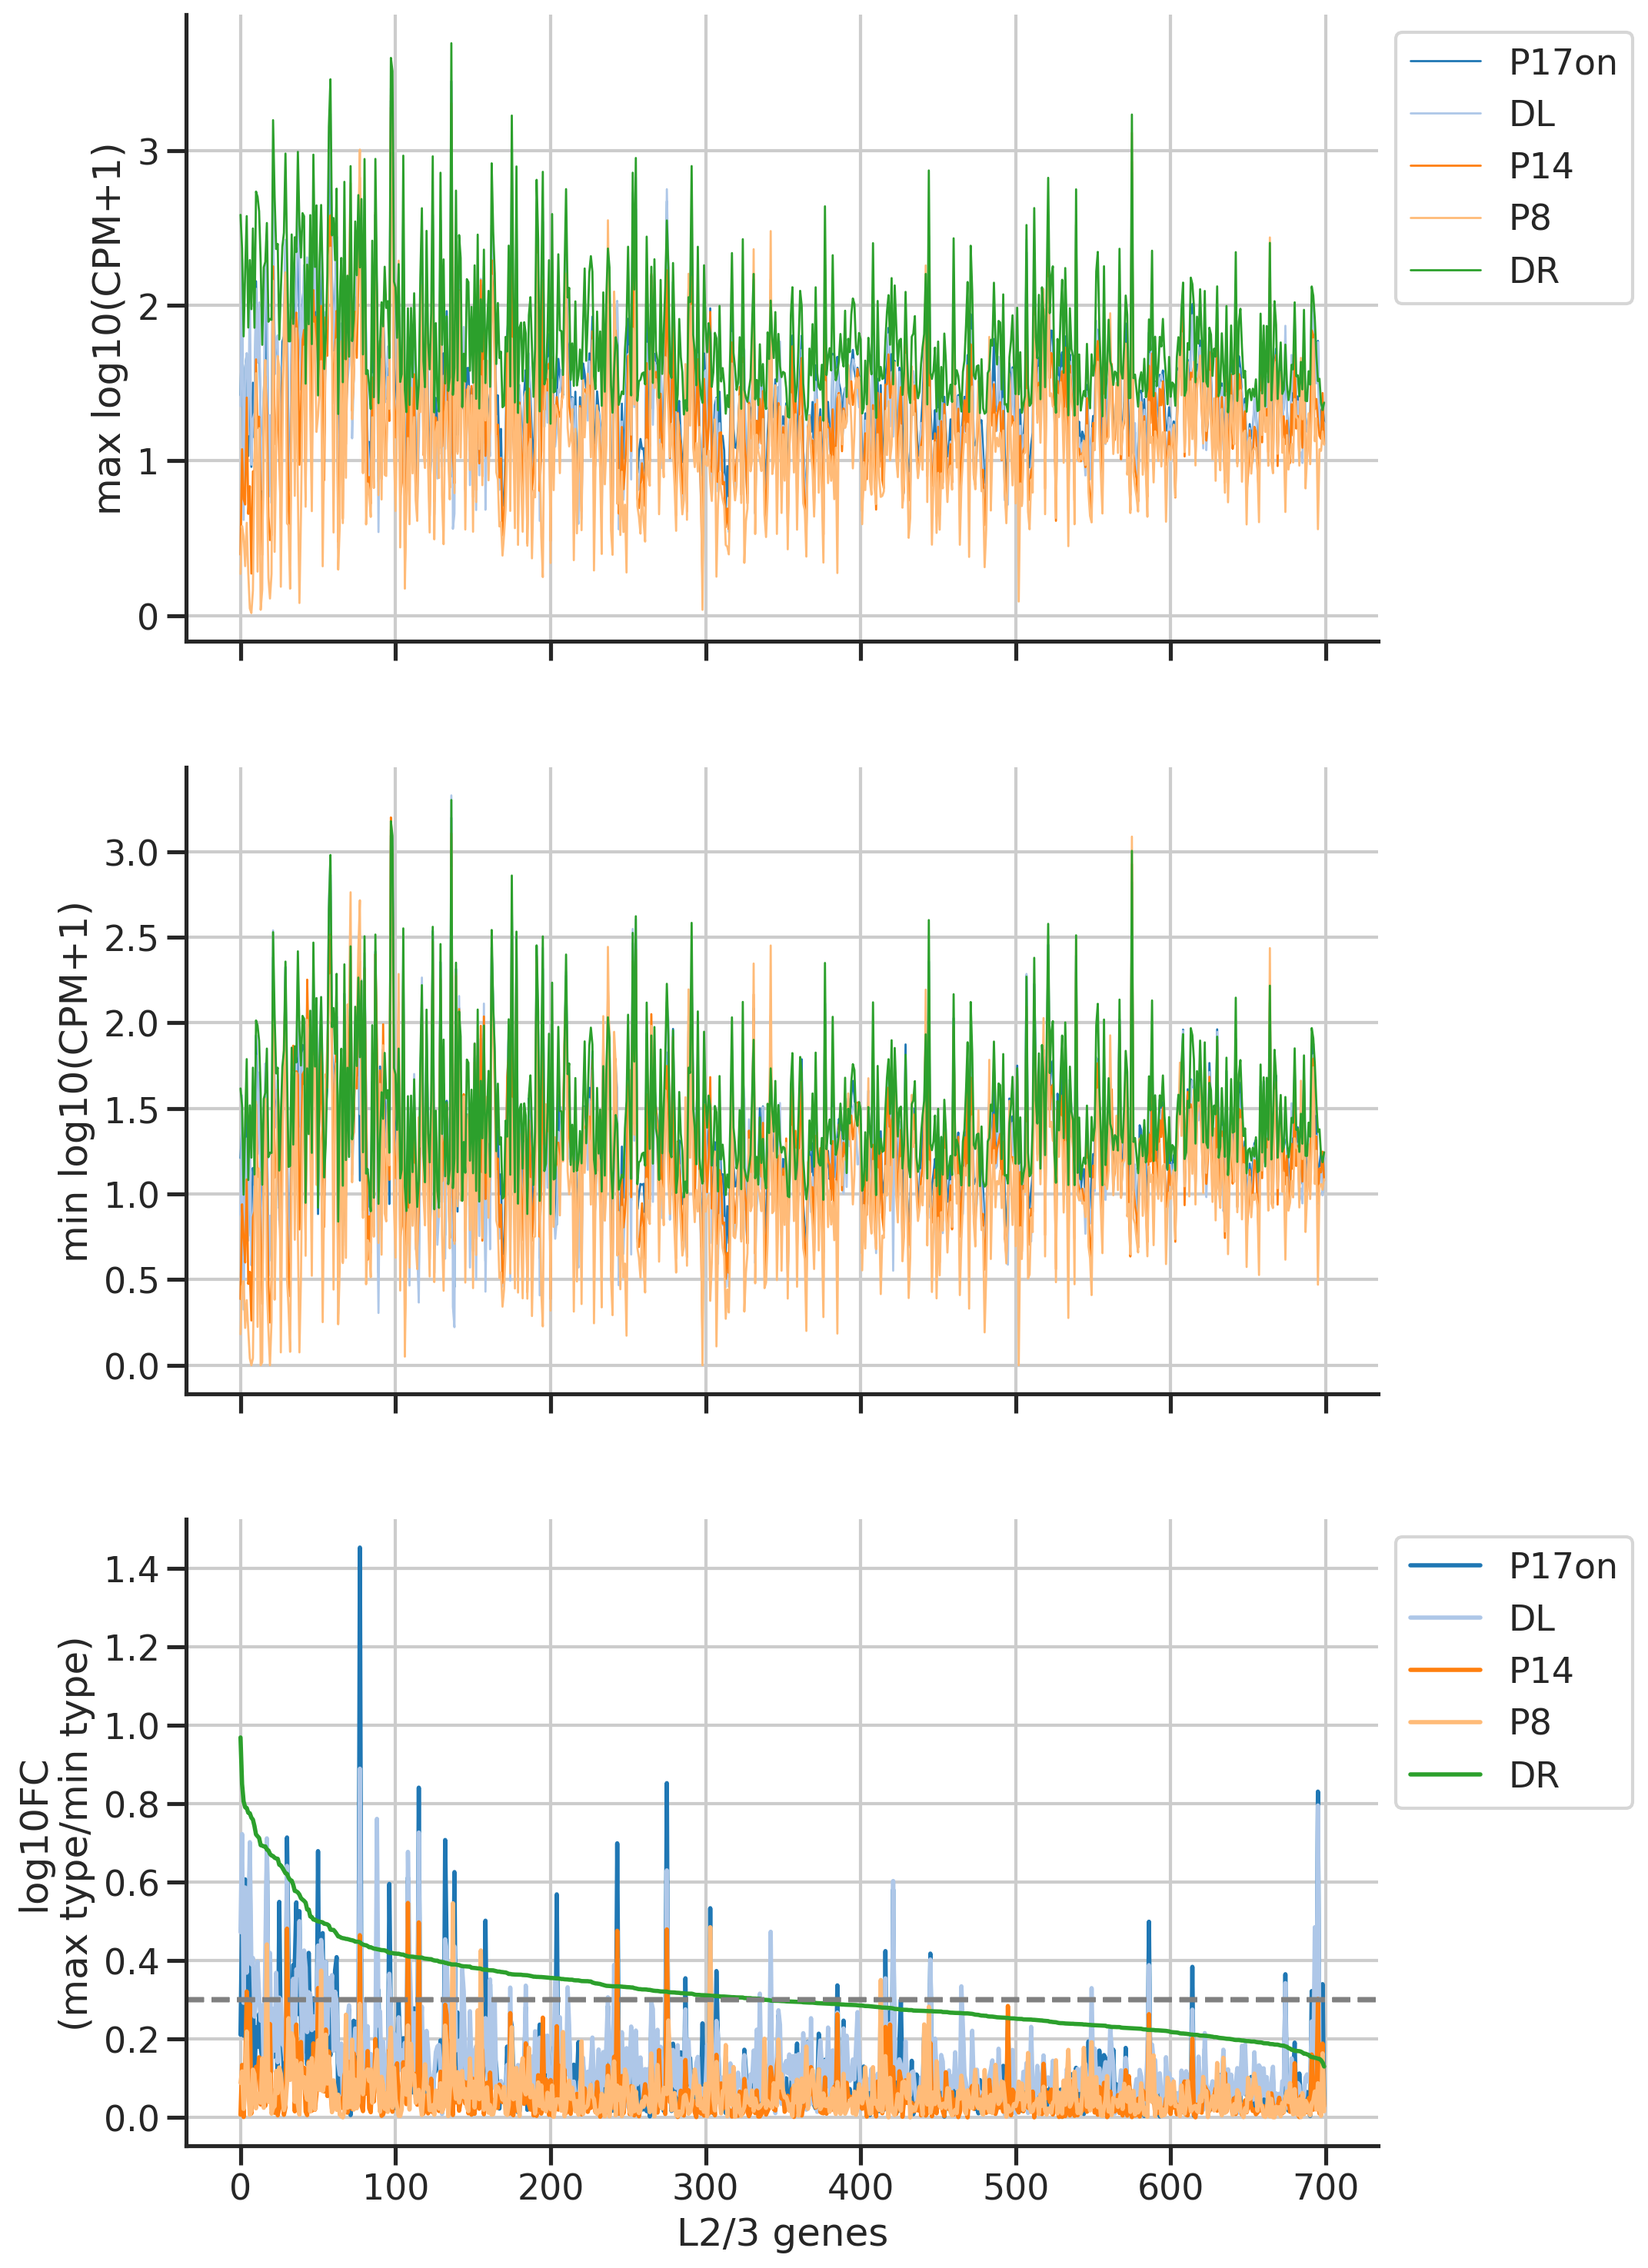

In [44]:
order = np.argsort(lfcexp_dr)[::-1]

fig, axs = plt.subplots(3,1,figsize=(1*10,3*6), sharex=True)
plot_l23genes_v2(maxexp_nr, minexp_nr, lfcexp_nr, order=order, axs=axs, color=colors[0], lbl='P17on')
plot_l23genes_v2(maxexp_dl, minexp_dl, lfcexp_dl, order=order, axs=axs, color=colors[1], lbl='DL')
plot_l23genes_v2(maxexp_14, minexp_14, lfcexp_14, order=order, axs=axs, color=colors[2], lbl='P14')
plot_l23genes_v2(maxexp_08, minexp_08, lfcexp_08, order=order, axs=axs, color=colors[3], lbl='P8')
plot_l23genes_v2(maxexp_dr, minexp_dr, lfcexp_dr, order=order, axs=axs, color=colors[4], lbl='DR')
plt.show()

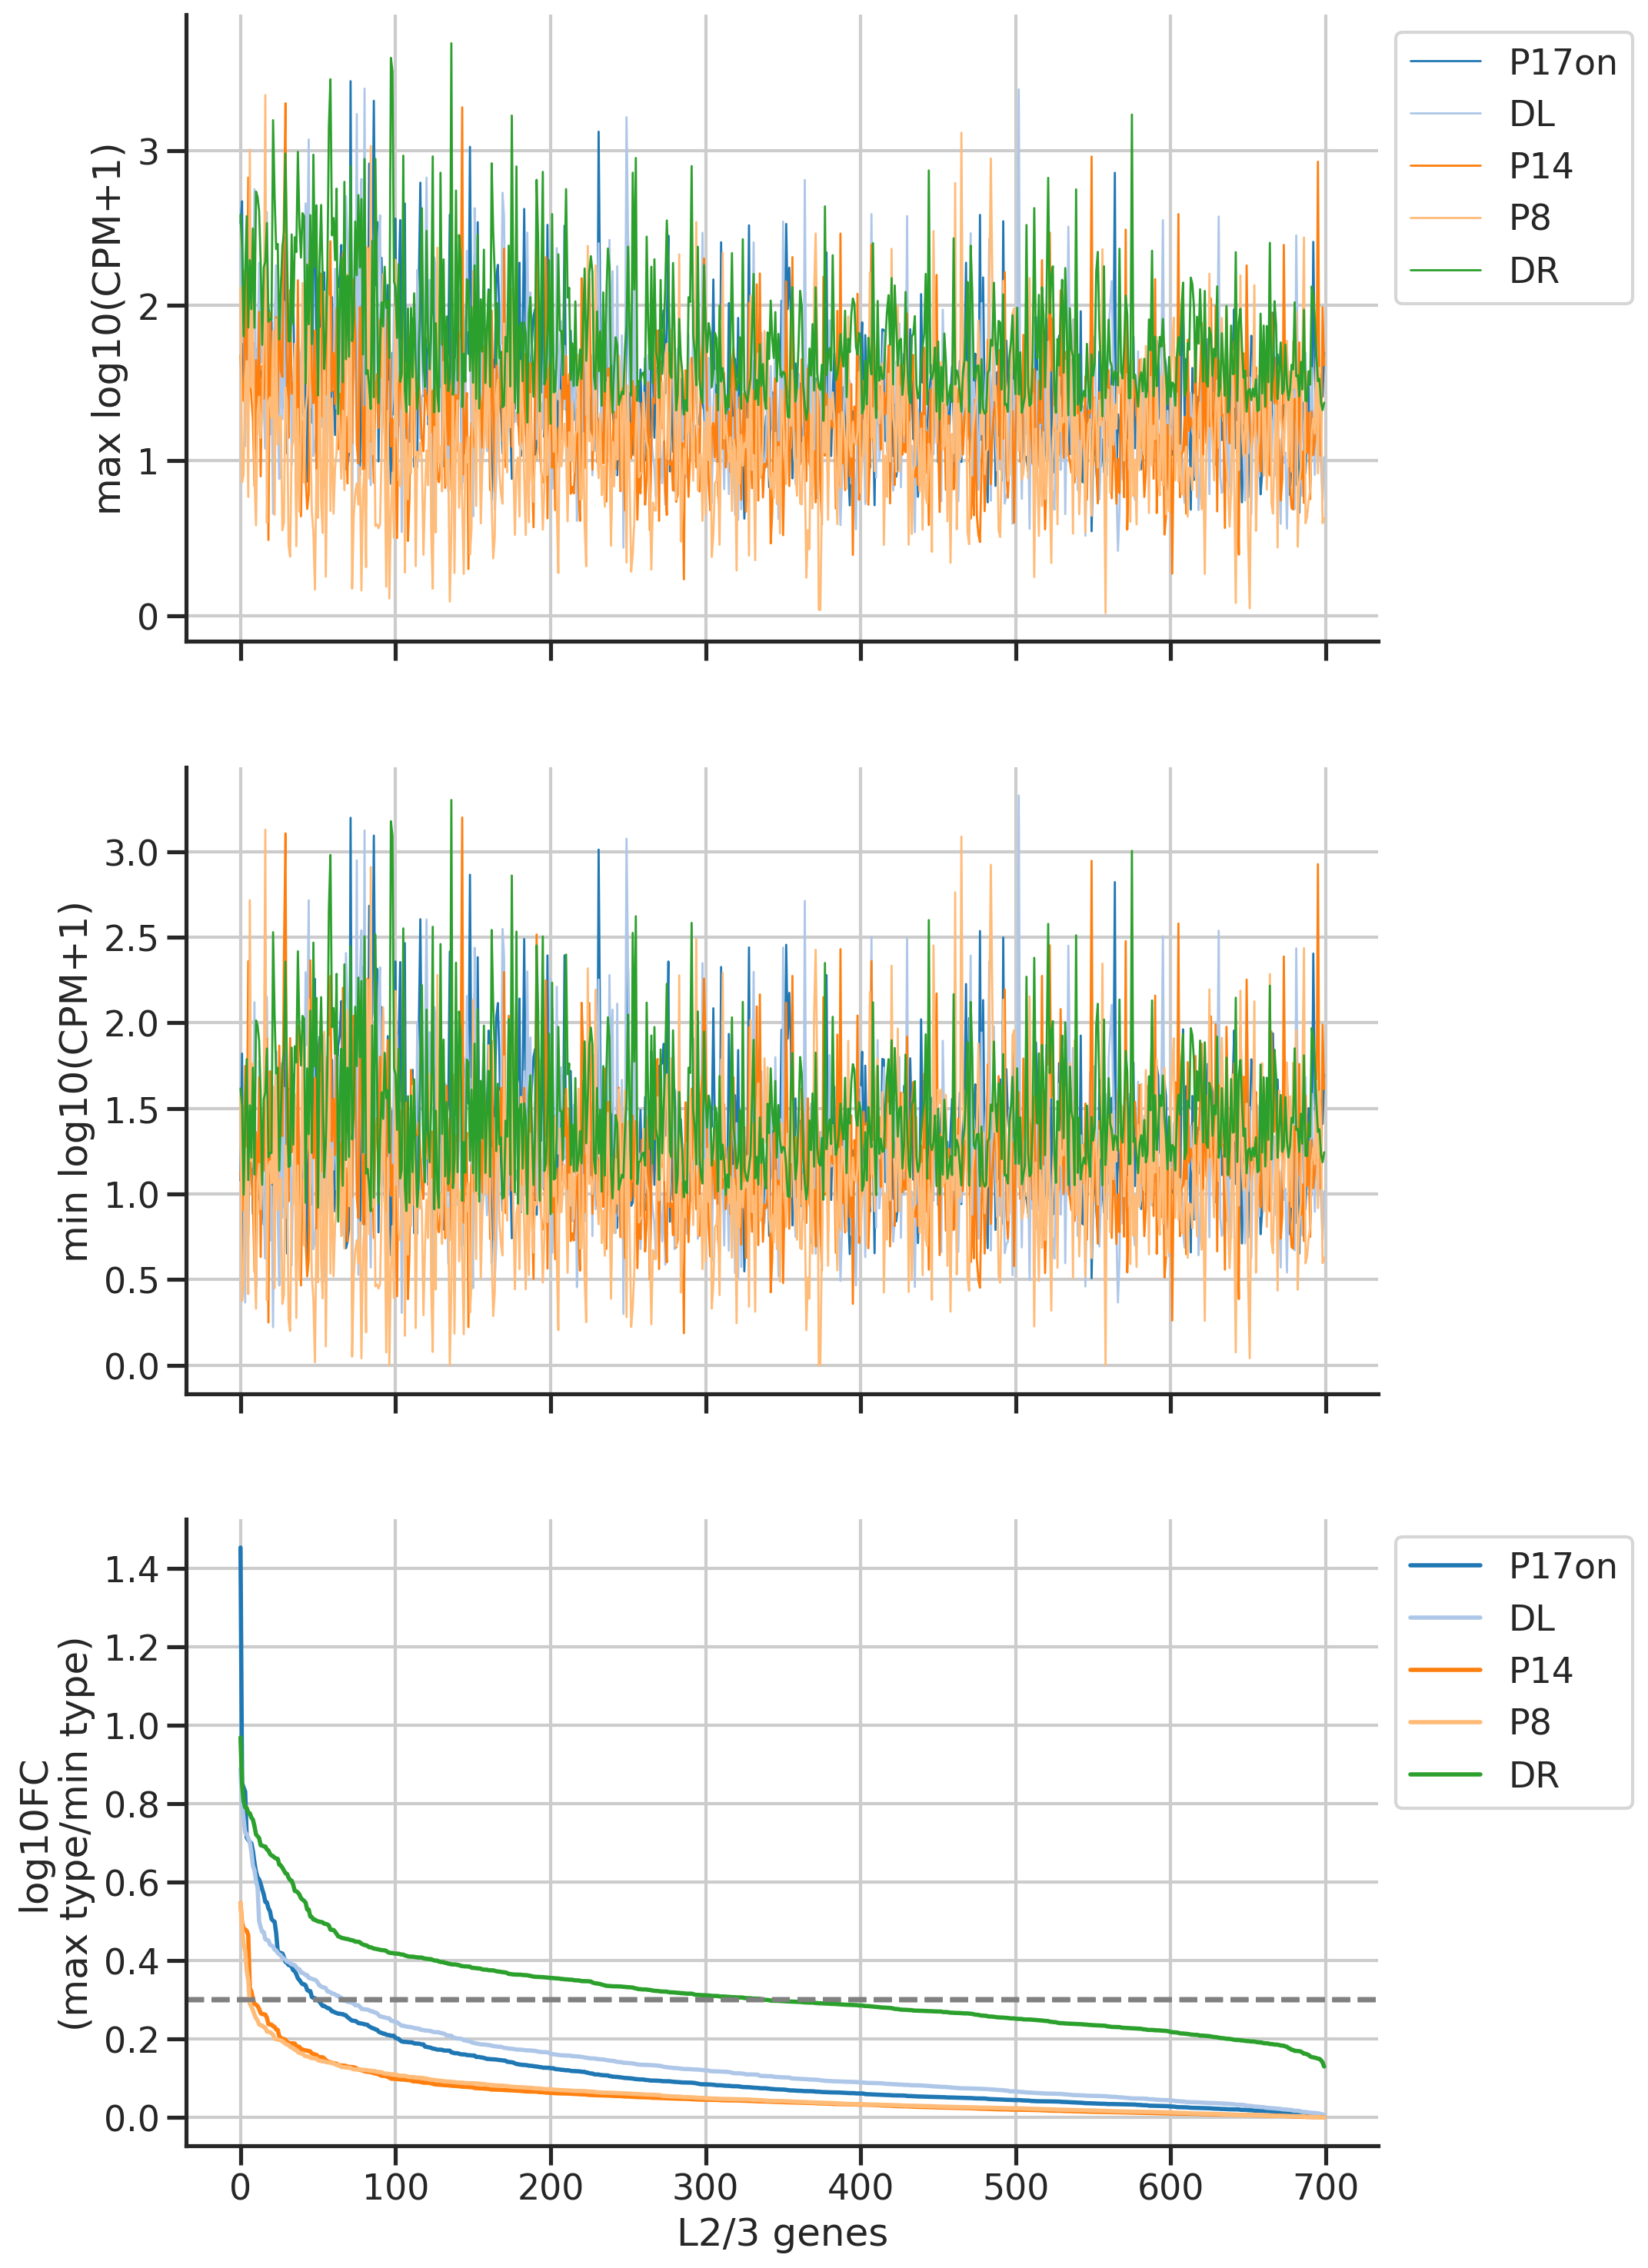

In [40]:
fig, axs = plt.subplots(3,1,figsize=(1*10,3*6), sharex=True)
order = np.argsort(lfcexp_nr)[::-1]
plot_l23genes_v2(maxexp_nr, minexp_nr, lfcexp_nr, order=order, axs=axs, color=colors[0], lbl='P17on')

order = np.argsort(lfcexp_dl)[::-1]
plot_l23genes_v2(maxexp_dl, minexp_dl, lfcexp_dl, order=order, axs=axs, color=colors[1], lbl='DL')

order = np.argsort(lfcexp_14)[::-1]
plot_l23genes_v2(maxexp_14, minexp_14, lfcexp_14, order=order, axs=axs, color=colors[2], lbl='P14')

order = np.argsort(lfcexp_08)[::-1]
plot_l23genes_v2(maxexp_08, minexp_08, lfcexp_08, order=order, axs=axs, color=colors[3], lbl='P8')

order = np.argsort(lfcexp_dr)[::-1]
plot_l23genes_v2(maxexp_dr, minexp_dr, lfcexp_dr, order=order, axs=axs, color=colors[4], lbl='DR')
plt.show()

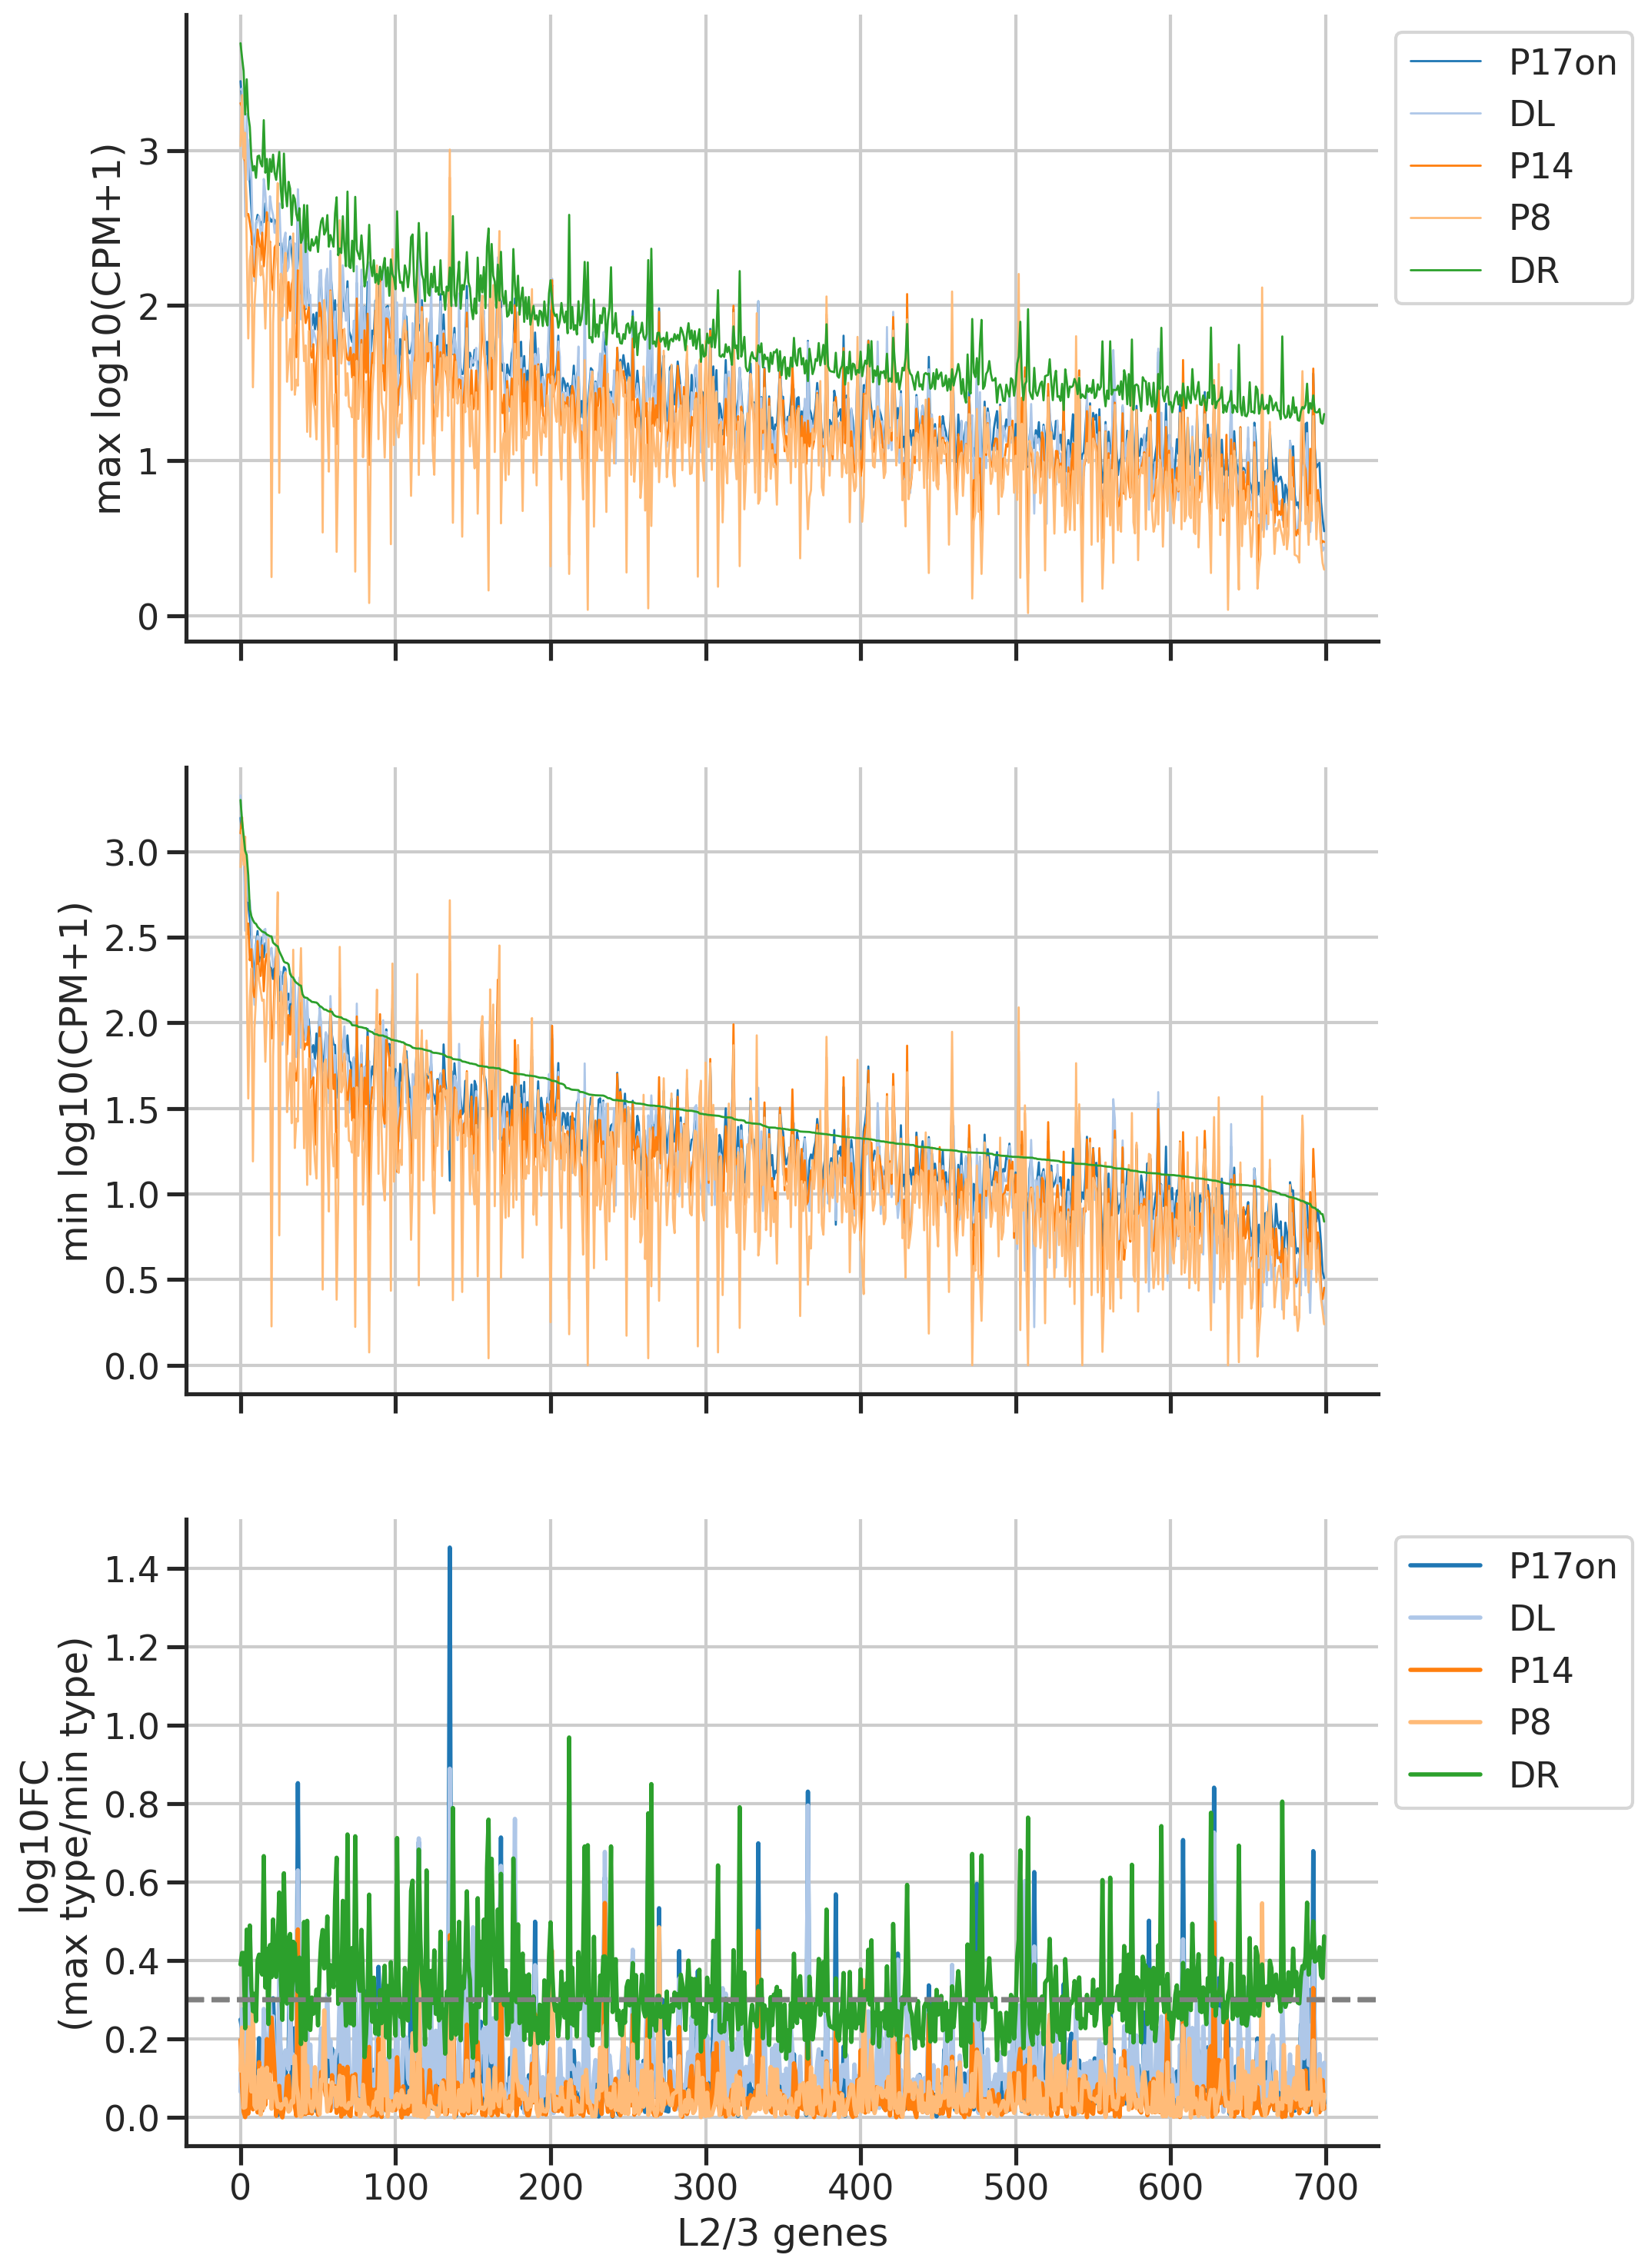

In [43]:
order = np.argsort(minexp_dr)[::-1]

fig, axs = plt.subplots(3,1,figsize=(1*10,3*6), sharex=True)
plot_l23genes_v2(maxexp_nr, minexp_nr, lfcexp_nr, order=order, axs=axs, color=colors[0], lbl='P17on')
plot_l23genes_v2(maxexp_dl, minexp_dl, lfcexp_dl, order=order, axs=axs, color=colors[1], lbl='DL')
plot_l23genes_v2(maxexp_14, minexp_14, lfcexp_14, order=order, axs=axs, color=colors[2], lbl='P14')
plot_l23genes_v2(maxexp_08, minexp_08, lfcexp_08, order=order, axs=axs, color=colors[3], lbl='P8')
plot_l23genes_v2(maxexp_dr, minexp_dr, lfcexp_dr, order=order, axs=axs, color=colors[4], lbl='DR')
plt.show()